<a href="https://colab.research.google.com/github/srpineda/ml-project-titanic-kaggle/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle's Titanic - Machine Learning from Disaster
https://www.kaggle.com/c/titanic/



## 1. Problem Definition
In this project, we have to build a machine learning model that predicts whether or not a passenger of the Titanic ship survived the Titanic shipwreck.



## 2. Data
The data is downloaded from the Titanic Kaggle competition: https://www.kaggle.com/c/titanic/data

### Data dictionary

1. Survived - whether or not the passenger survived
 - 0 = No
 - 1 = Yes

2. Pclass - the ticket class; a proxy for socio-economic status (SES)
 - 1 = 1st (Upper)
 - 2 = 2nd (Middle)
 - 3 = 3rd (Lower)

3. Sex
  - male
  - female

4. Age (Age in years) 	
 - Age is fractional if less than 1 year.
 - If the age is estimated, it is in the form of xx.5
 
5. SibSp - # of siblings/spouses aboard the Titanic. The dataset defines family relations in the following way:
 - Sibling = brother, sister, stepbrother, stepsister
 - Spouse = husband, wife (mistresses and fiancés were ignored)

6. Parch - # of parents / children aboard the Titanic. The dataset defines family relations in the following way:
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.

7. Ticket - Ticket number

8. Fare - Passenger fare	

9. Cabin - cabin number	

10. Embarked - Port of Embarkation
 - C = Cherbourg
 - Q = Queenstown
 - S = Southampton



## 3. Evalutation Metric
The metric to be used to evaluate the model is accuracy score: the fraction of predictions our model got right.
$$\text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

In [ ]:
# Mount drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory to kaggle dir
%cd /content/drive/MyDrive/kaggle

/content/drive/MyDrive/kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

# Kaggle Titanic dataset API
!kaggle competitions download -c titanic

In [ ]:
# Present working directory
!pwd

/content


In [ ]:
# Import some Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regex
import re   

#sklearn
from sklearn.model_selection import train_test_split

#joblib
from joblib import dump, load

## Exploratory Data Analysis

In [ ]:
# Import the training set
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Total number of records in the training set
len(train)

891

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
len(train.columns)

12

In [ ]:
# Import the test set
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# Total number of records in the test set
len(test)

418

In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
len(test.columns)

11

The test set has the same columns as the training set except that we do not have 'Survived' target column in the test set.

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Survived (Numeric)
 - 0 = No
 - 1 = Yes

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

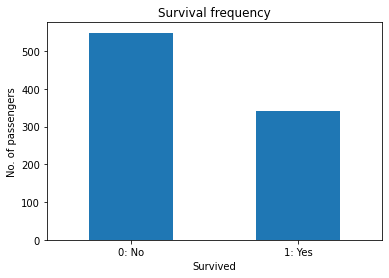

In [ ]:
train['Survived'].value_counts().plot.bar()
plt.xticks([0,1], labels = ['0: No', '1: Yes'], rotation = 0)
plt.ylabel('No. of passengers')
plt.xlabel('Survived')
plt.title('Survival frequency');

In [ ]:
# Distribution of data according to Survival
train['Survived'].value_counts(normalize = True).mul(100).round(1).astype(str) +'%'

0    61.6%
1    38.4%
Name: Survived, dtype: object

### Pclass (Numeric)
- the ticket class; a proxy for socio-economic status (SES)
 - 1 = 1st (Upper)
 - 2 = 2nd (Middle)
 - 3 = 3rd (Lower)


In [ ]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

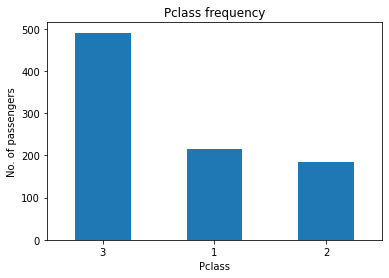

In [ ]:
train['Pclass'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.ylabel('No. of passengers')
plt.xlabel('Pclass')
plt.title('Pclass frequency');

Most passengers in the training set are of lower class status. The total number of middle and upper class passengers still does not exceed the number of lower class passengers.

In [ ]:
# Survival classification according to Pclass
pd.crosstab(train['Pclass'], train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


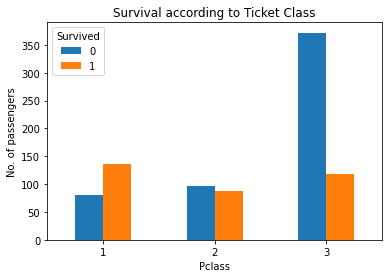

In [ ]:
pd.crosstab(train['Pclass'], train['Survived']).plot.bar()
plt.xticks(rotation=0)
plt.title('Survival according to Ticket Class')
plt.ylabel('No. of passengers');

Most survivors are of Upper ticket class.

In [ ]:
pd.crosstab(train['Pclass'], train['Survived'], normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


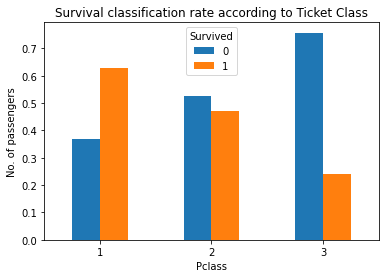

In [ ]:
pd.crosstab(train['Pclass'], train['Survived'], normalize='index').plot.bar()
plt.xticks(rotation=0)
plt.title('Survival classification rate according to Ticket Class')
plt.ylabel('No. of passengers');

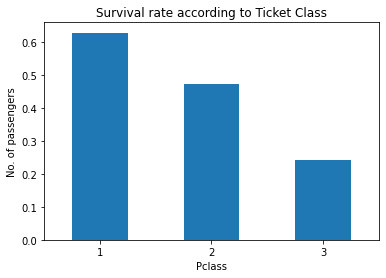

In [ ]:
pd.crosstab(train['Pclass'], train['Survived'], normalize='index')[1].plot.bar()
plt.xticks(rotation=0)
plt.title('Survival rate according to Ticket Class')
plt.ylabel('No. of passengers');

You have more than 60% of survival rate if you are of Upper ticket class.

You have more than 75% of nonsurvival rate if you are of Lower ticket class.

### Name (String)

In [ ]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Last Name (not added)

In [ ]:
train['Name'][0].split(',')[0]

'Braund'

In [ ]:
train_fe['Name_last'] = ''

In [ ]:
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_last
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,7.0,


In [ ]:
for i in range(len(train)):
  train_fe['Name_last'][i] = train['Name'][i].split(',')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_last
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,7.0,Allen


In [ ]:
train_fe['Name'][1]

'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'

In [ ]:
train['Name'][11:30]

11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles Eugene
18    Vander Planke, Mrs. Julius (Emelia Maria Vande...
19                              Masselmani, Mrs. Fatima
20                                 Fynney, Mr. Joseph J
21                                Beesley, Mr. Lawrence
22                          McGowan, Miss. Anna "Annie"
23                         Sloper, Mr. William Thompson
24                        Palsson, Miss. Torborg Danira
25    Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
26                              Emir, Mr. Farred Chehab
27                       Fortune, Mr. Charles Alexander
28                        O'Dwyer, Miss. Ellen "

In [ ]:
train['Name'].tail(20)

871    Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                            Carlsson, Mr. Frans Olof
873                         Vander Cruyssen, Mr. Victor
874               Abelson, Mrs. Samuel (Hannah Wizosky)
875                    Najib, Miss. Adele Kiamie "Jane"
876                       Gustafsson, Mr. Alfred Ossian
877                                Petroff, Mr. Nedelio
878                                  Laleff, Mr. Kristo
879       Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
880        Shelley, Mrs. William (Imanita Parrish Hall)
881                                  Markun, Mr. Johann
882                        Dahlberg, Miss. Gerda Ulrika
883                       Banfield, Mr. Frederick James
884                              Sutehall, Mr. Henry Jr
885                Rice, Mrs. William (Margaret Norton)
886                               Montvila, Rev. Juozas
887                        Graham, Miss. Margaret Edith
888            Johnston, Miss. Catherine Helen "

#### Name Title (new)

In [ ]:
train_fe['Name_title'] = ''

In [ ]:
train_fe.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,5.0,
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,3.0,
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN,
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,5.0,
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,6.0,


In [ ]:
for i in range(len(train_fe)):
  if train_fe['Name'][i].split(',')[1].split('.')[0].strip() == 'Capt':
    print(i)

745


In [ ]:
train_fe[train_fe['PassengerId']==746]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S,14.0,Special,1,B


In [ ]:
train_fe['Name'][2].split(',')[1].split('.')[0].strip()

'Miss'

In [ ]:
for i in range(len(train)):
  train_fe['Name_title'][i] = train_fe['Name'][i].split(',')[1].split('.')[0].strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,7.0,Mr


In [ ]:
train_fe['Name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name_title, dtype: int64

In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Name_title'])

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [ ]:
pd.crosstab(train_fe['Age_group'], train_fe['Name_title'])

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Age_group,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,23,17,0,0,0,0,0,0,0,0
1.0,0,0,0,0,0,0,0,9,13,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,4,8,0,0,3,1,0,0,0,0
3.0,0,0,0,0,0,0,0,0,28,0,0,50,8,0,0,0,0
4.0,0,0,0,1,0,0,0,0,28,2,1,71,11,0,0,0,0
5.0,0,0,0,0,0,0,0,0,12,0,0,74,17,1,2,0,0
6.0,0,0,0,1,0,0,0,0,17,0,0,61,15,0,0,0,1
7.0,0,0,0,0,1,0,0,0,11,0,0,44,16,0,0,0,0
8.0,0,0,1,1,0,0,0,0,4,0,0,27,14,0,1,0,0


In [ ]:
import seaborn as sns

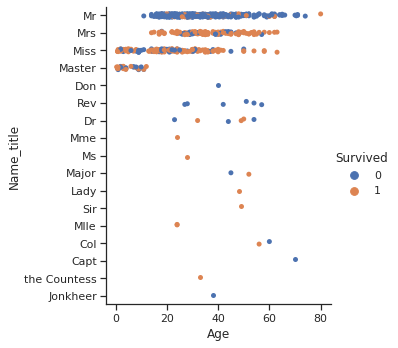

In [ ]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Age", y="Name_title", hue='Survived',  data=train_fe)

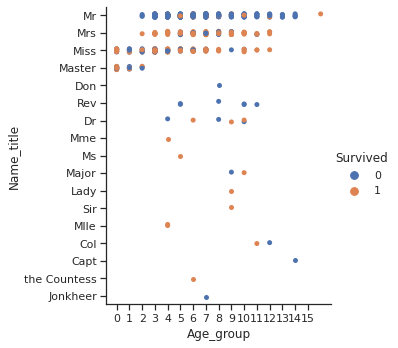

In [ ]:
sns.set_theme(style="ticks")
g = sns.catplot(x="Age_group", y="Name_title", hue='Survived',  data=train_fe)
plt.xticks(range(0,16,1));

##### Format standardization
- Mr
- Mrs
- Master
- Miss: Mlle, Mme, Ms
- Special: Capt, Col, Don, Dr, Jonkheer, Lady, Major, Rev, Sir, the Countess


In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Name_title'], normalize='columns')

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,0.5,1.0,0.571429,1.0,0.0,0.5,0.425,0.302198,0.0,0.0,0.843327,0.208,0.0,1.0,0.0,0.0
1,0.0,0.5,0.0,0.428571,0.0,1.0,0.5,0.575,0.697802,1.0,1.0,0.156673,0.792,1.0,0.0,1.0,1.0


In [ ]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_group    714 non-null    float64
 13  Name_title   891 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [ ]:
# Format standardization
for i in range(len(train)):
  if train_fe['Name_title'][i] in ['Mlle', 'Mme', 'Ms']:
    train_fe['Name_title'][i]='Miss'
  elif train_fe['Name_title'][i] not in ['Mr', 'Mrs', 'Master', 'Miss']:
    train_fe['Name_title'][i]='Special'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_fe['Name_title'].value_counts()

Mr         517
Miss       186
Mrs        125
Master      40
Special     23
Name: Name_title, dtype: int64

In [ ]:
train_fe.to_csv('train_fe', index=False)

In [ ]:
pd.crosstab(train_fe.Survived, train_fe.Name_title)

Name_title,Master,Miss,Mr,Mrs,Special
Survived,,,,,
0,17,55,436,26,15
1,23,131,81,99,8


In [ ]:
pd.crosstab(train_fe.Survived, train_fe.Name_title).loc[1]

Name_title
Master      23
Miss       131
Mr          81
Mrs         99
Special      8
Name: 1, dtype: int64

In [ ]:
Name_title_crosstab = pd.crosstab(train_fe.Survived, train_fe.Name_title, normalize = 'columns')
Name_title_crosstab

Name_title,Master,Miss,Mr,Mrs,Special
Survived,,,,,
0,0.425,0.295699,0.843327,0.208,0.652174
1,0.575,0.704301,0.156673,0.792,0.347826


In [ ]:
Name_title_crosstab.loc[1, 'Master']

0.575

Checking if Name Title is consistent with Sex

In [ ]:
pd.crosstab(train_fe['Sex'], train_fe['Name_title'])

Name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


##### Convert to numeric

In [ ]:
train_fe['Name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Special'], dtype=object)

In [ ]:
for title in train_fe['Name_title'].unique():
  print(title)
  print(Name_title_crosstab.loc[1,title].round(3))

Mr
0.157
Mrs
0.792
Miss
0.704
Master
0.575
Special
0.348


In [ ]:
train_fe.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,NaN,S,5.0,Special
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,B42,S,3.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.45,NaN,S,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C148,C,5.0,Mr
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,NaN,Q,6.0,Mr


In [ ]:
train_fe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_group',
       'Name_title'],
      dtype='object')

In [ ]:
train_numeric = pd.DataFrame(train_fe)
train_numeric

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,7.0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,5.0,Special
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,3.0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,5.0,Mr


In [ ]:
train_numeric.drop(['PassengerId', 'Name'], axis=1, inplace=True)

In [ ]:
train_numeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,Mr
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,Miss
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,7.0,Mr


In [ ]:
Name_title_crosstab = pd.crosstab(train_fe.Survived, train_fe.Name_title, normalize = 'columns')
for i in range(len(train)):
    if train_fe['Name_title'][i]=='Mr':
      train_numeric['Name_title'][i] = Name_title_crosstab.loc[1,'Mr'].round(3)
    elif train_fe['Name_title'][i]=='Mrs':
      train_numeric['Name_title'][i] = Name_title_crosstab.loc[1,'Mrs'].round(3)
    elif train_fe['Name_title'][i]=='Master':
      train_numeric['Name_title'][i] = Name_title_crosstab.loc[1,'Master'].round(3)
    elif train_fe['Name_title'][i]=='Miss':
      train_numeric['Name_title'][i] = Name_title_crosstab.loc[1,'Miss'].round(3)
    elif train_fe['Name_title'][i]=='Special':
      train_numeric['Name_title'][i] = Name_title_crosstab.loc[1,'Special'].round(3)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/py

In [ ]:
train_numeric['Name_title'].value_counts()

0.157    517
0.704    186
0.792    125
0.575     40
0.348     23
Name: Name_title, dtype: int64

In [ ]:
train_fe.Name_title.value_counts()

Mr         517
Miss       186
Mrs        125
Master      40
Special     23
Name: Name_title, dtype: int64

In [ ]:
Name_title_crosstab.loc[1]

Name_title
Master     0.575000
Miss       0.704301
Mr         0.156673
Mrs        0.792000
Special    0.347826
Name: 1, dtype: float64

In [ ]:
train_numeric.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,0.157
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,7.0,0.792
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,0.704
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,7.0,0.792
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,7.0,0.157


### Sex
  - male
  - female


In [ ]:
train_fe['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

#### Convert to numeric
male: 0

female: 1

In [ ]:
for i in range(len(train)):
  if train_fe['Sex'][i]=='male':
    train_fe['Sex'][i] = 0
  else: train_fe['Sex'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_fe['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

### Age 
(Age in years) 	
 - Age is fractional if less than 1 year.
 - If the age is estimated, it is in the form of xx.5
 

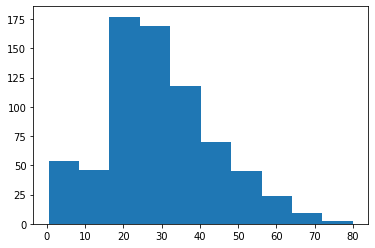

In [ ]:
# Histogram - shows frequency distribution
plt.hist(train['Age']);

In [ ]:
# Age Frequency 
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
# Age Median
train['Age'].median()

28.0

In [ ]:
# Age Mean
train['Age'].mean()

29.69911764705882

In [ ]:
pd.crosstab(train['Age'].isnull(), train['Survived'], normalize = 'index')

Survived,0,1
Age,,
False,0.593838,0.406162
True,0.706215,0.293785


70% of the passengers with Null age values did not survive.

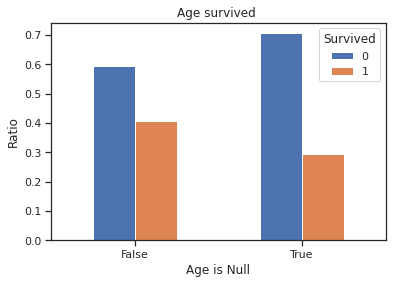

In [ ]:
pd.crosstab(train['Age'].isnull(), train['Survived'], normalize = 'index').plot.bar()
plt.xlabel('Age is Null')
plt.xticks(rotation=0)
plt.ylabel('Ratio')
plt.title('Age survived ');

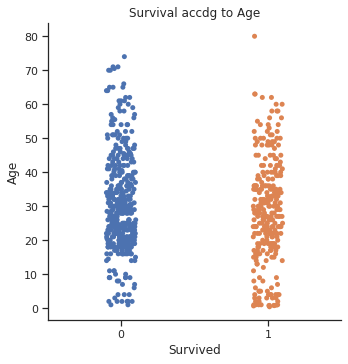

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
g = sns.catplot( x="Survived", y="Age", data=train)
plt.title('Survival accdg to Age');

In [ ]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train['Age'].quantile(0.9)

50.0

In [ ]:
train['Age'].quantile(0.97)

60.610000000000014

In [ ]:
train['Age'].quantile(0.99)

65.87

#### Age Group (new)
We make another column classifying passengers based on their age range. We will use the five year age groups
- 0: 0-4 years
- 1: 5-9
- 2: 10-14
- 3: 15-19
- 4: 20-24
- 5: 25-29
- 6: 30-34
- 7: 35-39
- 8: 40-44
- 9: 45-49
-10: 50-55
-11: 55-59
-12: 60-64
-13: 65-69
-14: 70-74
-15: 75-79
-16: 80

In [ ]:
train['Age_group'] = ''

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_group'],
      dtype='object')

In [ ]:
for i in range(len(train)):
  if train['Age'][i] is not None:
    train['Age_group'][i] = train['Age'][i]//5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train['Age_group'].value_counts()

4.0     114
5.0     106
6.0      95
3.0      86
7.0      72
8.0      48
9.0      41
0.0      40
10.0     32
1.0      22
2.0      16
11.0     16
12.0     15
14.0      6
13.0      4
16.0      1
Name: Age_group, dtype: int64

In [ ]:
train['Age_group'].isnull().sum()

177

The passengers are mostly of age 20-39 years (4-6 age groups). Altho there are a lot of missing values (177).

In [ ]:
# Save to csv
train.to_csv('train_fe', index=False)

In [ ]:
# Import train_fe
train_fe = pd.read_csv('train_fe')

In [ ]:
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,7.0


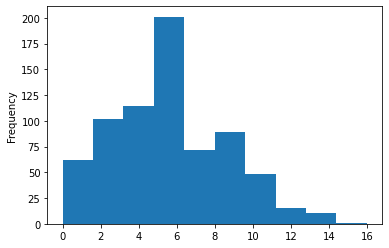

In [ ]:
train_fe['Age_group'].plot.hist();

In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Age_group'])

Age_group,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,16.0
Survived,,,,,,,,,,,,,,,,
0,13,11,9,52,75,68,55,39,30,25,18,10,9,4,6,0
1,27,11,7,34,39,38,40,33,18,16,14,6,6,0,0,1


In [ ]:
for i in range(len(train)):
  if train_fe['Age_group'][i]==16:
    print(train['Age'][i], 'years')

80.0 years


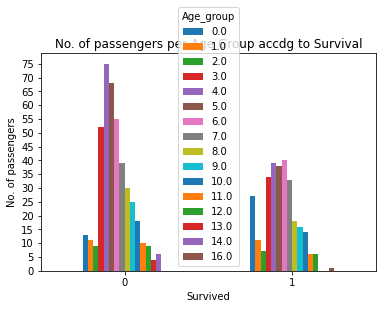

In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Age_group']).plot.bar()
plt.xticks(rotation=0)
plt.yticks(range(0,76,5))
plt.ylabel('No. of passengers')
plt.title('No. of passengers per Age Group accdg to Survival');

In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Age_group'], normalize = 'columns')

Age_group,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,16.0
Survived,,,,,,,,,,,,,,,,
0,0.325,0.5,0.5625,0.604651,0.657895,0.641509,0.578947,0.541667,0.625,0.609756,0.5625,0.625,0.6,1.0,1.0,0.0
1,0.675,0.5,0.4375,0.395349,0.342105,0.358491,0.421053,0.458333,0.375,0.390244,0.4375,0.375,0.4,0.0,0.0,1.0


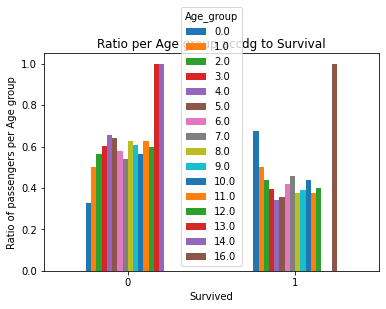

In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Age_group'], normalize = 'columns').plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Ratio of passengers per Age group')
plt.title('Ratio per Age group accdg to Survival');

The lone 80 year old survived. There are no passengers of ages 75-79. No one survived for ages 65-74.

High survival rate for children ages 0-5

In [ ]:
for i in range(len(train)):
  if train_fe['Age_group'][i]==0:
    print(i,':', train['Age'][i], 'year/s, Survived: ', train_fe['Survived'][i])

7 : 2.0 year/s, Survived:  0
10 : 4.0 year/s, Survived:  1
16 : 2.0 year/s, Survived:  0
43 : 3.0 year/s, Survived:  1
63 : 4.0 year/s, Survived:  0
78 : 0.83 year/s, Survived:  1
119 : 2.0 year/s, Survived:  0
164 : 1.0 year/s, Survived:  0
171 : 4.0 year/s, Survived:  0
172 : 1.0 year/s, Survived:  1
183 : 1.0 year/s, Survived:  1
184 : 4.0 year/s, Survived:  1
193 : 3.0 year/s, Survived:  1
205 : 2.0 year/s, Survived:  0
261 : 3.0 year/s, Survived:  1
297 : 2.0 year/s, Survived:  0
305 : 0.92 year/s, Survived:  1
340 : 2.0 year/s, Survived:  1
348 : 3.0 year/s, Survived:  1
374 : 3.0 year/s, Survived:  0
381 : 1.0 year/s, Survived:  1
386 : 1.0 year/s, Survived:  0
407 : 3.0 year/s, Survived:  1
445 : 4.0 year/s, Survived:  1
469 : 0.75 year/s, Survived:  1
479 : 2.0 year/s, Survived:  1
530 : 2.0 year/s, Survived:  1
618 : 4.0 year/s, Survived:  1
642 : 2.0 year/s, Survived:  0
644 : 0.75 year/s, Survived:  1
691 : 4.0 year/s, Survived:  1
750 : 4.0 year/s, Survived:  1
755 : 0.67 

All age < 1 have survived.

In [ ]:
for i in range(len(train)):
  if train_fe['Age_group'][i]==1:
    print(i,':', train['Age'][i], 'year/s, Survived: ', train_fe['Survived'][i])

24 : 8.0 year/s, Survived:  0
50 : 7.0 year/s, Survived:  0
58 : 5.0 year/s, Survived:  1
147 : 9.0 year/s, Survived:  0
165 : 9.0 year/s, Survived:  1
182 : 9.0 year/s, Survived:  0
233 : 5.0 year/s, Survived:  1
237 : 8.0 year/s, Survived:  1
278 : 7.0 year/s, Survived:  0
448 : 5.0 year/s, Survived:  1
480 : 9.0 year/s, Survived:  0
489 : 9.0 year/s, Survived:  1
535 : 7.0 year/s, Survived:  1
541 : 9.0 year/s, Survived:  0
549 : 8.0 year/s, Survived:  1
634 : 9.0 year/s, Survived:  0
720 : 6.0 year/s, Survived:  1
751 : 6.0 year/s, Survived:  1
777 : 5.0 year/s, Survived:  1
787 : 8.0 year/s, Survived:  0
813 : 6.0 year/s, Survived:  0
852 : 9.0 year/s, Survived:  0


All age = 5,6 survived.

Age = 7, survival ratio (sr) 1/3 = 0.33

Age = 8, sr 2/4 = 0.5

Age = 9, sr 2/7 = 0.28

In [ ]:
train_fe['Age']//5

0      4.0
1      7.0
2      5.0
3      7.0
4      7.0
      ... 
886    5.0
887    3.0
888    NaN
889    5.0
890    6.0
Name: Age, Length: 891, dtype: float64

In [ ]:
train_fe['Age_group']

0      4.0
1      7.0
2      5.0
3      7.0
4      7.0
      ... 
886    5.0
887    3.0
888    NaN
889    5.0
890    6.0
Name: Age_group, Length: 891, dtype: float64

#### Age missing values

In [ ]:
train_fe[train_fe['Age'].isna()].filter(items=['Name_title', 'Age'], axis=1)

,Name_title,Age
5,Mr,NaN
17,Mr,NaN
19,Mrs,NaN
26,Mr,NaN
28,Miss,NaN
...,...,...
859,Mr,NaN
863,Miss,NaN
868,Mr,NaN
878,Mr,NaN


In [ ]:
train_fe[train_fe['Age'].isna()].filter(items=['Name_title', 'Age'], axis=1)['Name_title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Special'], dtype=object)

In [ ]:
pd.crosstab(train_fe.Age_group, train_fe.Name_title)

Name_title,Master,Miss,Mr,Mrs,Special
Age_group,,,,,
0.0,23,17,0,0,0
1.0,9,13,0,0,0
2.0,4,8,3,1,0
3.0,0,28,50,8,0
4.0,0,31,71,11,1
5.0,0,13,74,17,2
6.0,0,17,61,15,2
7.0,0,11,44,16,1
8.0,0,4,27,14,3


In [ ]:
train_fe[train_fe['Name_title']=='Mr'].mode(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_group
0,1,0.0,3.0,19.0,0.0,0.0,8.05,5.0
1,5,NaN,NaN,25.0,NaN,NaN,NaN,NaN
2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
512,882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
513,884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
514,885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
515,890,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The age that occurs the most for those with Name title = 'Mr' is 19 and 25. Most with 'Mr' title is in the Age group = 5, which is between 25-29 yrs old.

In [ ]:
train_fe[train_fe['Name_title']=='Mr']['Age'].median()

30.0

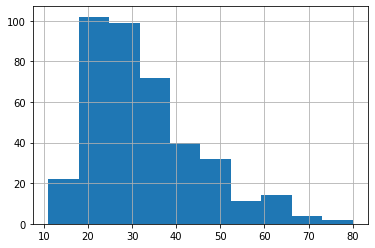

In [ ]:
train_fe[train_fe['Name_title']=='Mr']['Age'].hist();

In [ ]:
train_fe[train_fe['Name_title']=='Mr']['Age'].value_counts()

25.0    18
19.0    18
28.0    17
21.0    17
22.0    15
        ..
36.5     1
32.5     1
70.5     1
66.0     1
74.0     1
Name: Age, Length: 67, dtype: int64

In [ ]:
train_fe[train_fe['Name_title']=='Mr']['Age_group'].value_counts()

5.0     74
4.0     71
6.0     61
3.0     50
7.0     44
8.0     27
9.0     25
10.0    15
12.0    10
11.0     8
14.0     5
13.0     4
2.0      3
16.0     1
Name: Age_group, dtype: int64

Testing the code with a sample dataframe

In [ ]:
sampledf = pd.DataFrame([[1,2,3],[4,8],[7,8],[10,8,12],[13,14]])
sampledf

,0,1,2
0,1,2,3.0
1,4,8,NaN
2,7,8,NaN
3,10,8,12.0
4,13,14,NaN


In [ ]:
sampledf[2]

0     3.0
1     NaN
2     NaN
3    12.0
4     NaN
Name: 2, dtype: float64

In [ ]:
sampledf[sampledf[1]==8].index

Int64Index([1, 2, 3], dtype='int64')

In [ ]:
sampledf[2][1]

nan

In [ ]:
pd.isna(sampledf[2][1])

True

In [ ]:
for i in sampledf[sampledf[1]==8].index:
  if pd.isna(sampledf[2][i]):
    sampledf[2][i] = np.random.choice(range(25,30))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
sampledf

,0,1,2
0,1,2,3.0
1,4,8,27.0
2,7,8,26.0
3,10,8,12.0
4,13,14,NaN


In [ ]:
len(train_fe[train_fe['Name_title']=='Mr'])

517

In [ ]:
train_fe[train_fe['Name_title']=='Mr']['Age'].isnull().sum()

119

In [ ]:
train_numeric['Age'].isnull().sum()

177

In [ ]:
train_fe[train_fe['Name_title']=='Mr'][train_fe[train_fe['Name_title']=='Mr']['Age'].isnull()]['Survived'].sum()

14

In [ ]:
round(14/119, 2)

0.12

Out of the 119 passengers with 'Mr' title and with missing Age values, only 14 survived. That's a 12% survival rate.

In [ ]:
train_fe[train_fe['Name_title']=='Mr']['Survived'].sum()

81

In [ ]:
round(81/517, 2)

0.16

Out of the 517 passengers with 'Mr' title, only 81 survived. A 16% survival rate.

In [ ]:
len(train_fe[train_fe['Name_title']=='Mr'][train_fe[train_fe['Name_title']=='Mr']['Age_group']==5])

74

In [ ]:
train_fe[train_fe['Name_title']=='Mr'][train_fe[train_fe['Name_title']=='Mr']['Age_group']==5]['Survived'].sum()

18

In [ ]:
round(18/74, 2)

0.24

Out of the 74 passengers with 'Mr' title in the Age group: 5, 18 survived. A 24% survival rate.

In [ ]:
len(train_fe[train_fe['Name_title']=='Mr'][train_fe[train_fe['Name_title']=='Mr']['Age_group']==4])

71

In [ ]:
train_fe[train_fe['Name_title']=='Mr'][train_fe[train_fe['Name_title']=='Mr']['Age_group']==4]['Survived'].sum()

7

In [ ]:
round(7/71,2)

0.1

Out of the 71 passengers with 'Mr' title in the Age group: 4, 7 survived. A 10% survival rate.

In [ ]:
round((18+7)/(74+71),2)

0.17

17% Survival rate for those 'Mr's in the Age group 4 and 5.

In [ ]:
len(train_fe[train_fe['Name_title']=='Mr'][train_fe[train_fe['Name_title']=='Mr']['Age_group']==6]), train_fe[train_fe['Name_title']=='Mr'][train_fe[train_fe['Name_title']=='Mr']['Age_group']==6]['Survived'].sum()

(61, 12)

In [ ]:
round(12/61, 3)

0.197

In [ ]:
round((18+7+12)/(74+71+61),2)

0.18

18% Survival rate for combined age groups 4,5,6 with 'Mr' title.

In [ ]:
train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Mr']['Pclass'].value_counts()

3    90
1    20
2     9
Name: Pclass, dtype: int64

Most men with missing Age values have 3rd class ticket.

In [ ]:
train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Mr'].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,NaN,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,NaN,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,NaN,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,NaN,Mr
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,NaN,Mr
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,NaN,Mr
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,NaN,Mr
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,NaN,Mr
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,NaN,Mr


In [ ]:
train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Mr'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 5 to 878
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  119 non-null    int64  
 1   Survived     119 non-null    int64  
 2   Pclass       119 non-null    int64  
 3   Name         119 non-null    object 
 4   Sex          119 non-null    object 
 5   Age          0 non-null      float64
 6   SibSp        119 non-null    int64  
 7   Parch        119 non-null    int64  
 8   Ticket       119 non-null    object 
 9   Fare         119 non-null    float64
 10  Cabin        12 non-null     object 
 11  Embarked     119 non-null    object 
 12  Age_group    0 non-null      float64
 13  Name_title   119 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 13.9+ KB


Pclass = 3; Age = null, Name_title = Mr; Has Cabin?

##### Name title = 'Mr'
At first, I thought of filling the missing values by randomly choosing in the Age interval of the Age group with highest frequency. But since the survival rate of the Age group 5 24%, which is half of the survival rate of those with null values (12%), I decided to use the next highest frequency instead, the Age group 4, since that has nearer survival rate of 10%.

In [ ]:
[x for x in range(20,25)]

[20, 21, 22, 23, 24]

In [ ]:
len(train_fe[train_fe['Name_title']=='Mr'].index)

517

In [ ]:
for i in train_fe[train_fe['Name_title']=='Mr'].index:
  if pd.isna(train_fe['Age'][i]):
    train_fe['Age'][i] = np.random.choice(range(20,25))

In [ ]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          833 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_group    714 non-null    float64
 13  Name_title   891 non-null    object 
 14  Has_Cabin    891 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 104.5+ KB


##### Name title = 'Mrs' 

Dataframe containing records that have null Age values and Mrs title.

In [ ]:
df_nullAge_Mrs = train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Mrs']
df_nullAge_Mrs

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
19,1,3,female,NaN,0,0,7.2250,C,0,NaN,1,Mrs,0.0
31,1,1,female,NaN,1,0,146.5208,C,1,NaN,2,Mrs,1.0
140,0,3,female,NaN,0,2,15.2458,C,0,NaN,3,Mrs,0.0
166,1,1,female,NaN,0,1,55.0000,S,1,NaN,2,Mrs,0.0
186,1,3,female,NaN,1,0,15.5000,Q,0,NaN,2,Mrs,0.0
256,1,1,female,NaN,0,0,79.2000,C,0,NaN,1,Mrs,1.0
334,1,1,female,NaN,1,0,133.6500,S,0,NaN,2,Mrs,1.0
347,1,3,female,NaN,1,0,16.1000,S,0,NaN,2,Mrs,0.0
367,1,3,female,NaN,0,0,7.2292,C,0,NaN,1,Mrs,0.0
375,1,1,female,NaN,1,0,82.1708,C,0,NaN,2,Mrs,1.0


In [ ]:
len(df_nullAge_Mrs)

17

Survival rate of (above dataframe) Mrs passengers with null Age values.

14 out of 17 survived. 82% survival rate.

In [ ]:
df_nullAge_Mrs['Survived'].value_counts()

1    14
0     3
Name: Survived, dtype: int64

In [ ]:
df_nullAge_Mrs['Survived'].value_counts(normalize=True)

1    0.823529
0    0.176471
Name: Survived, dtype: float64

In [ ]:
df_nullAge_Mrs_survivalrate = round(df_nullAge_Mrs['Survived'].value_counts(normalize=True)[1], 3)
df_nullAge_Mrs_survivalrate

0.824

Survival rate of all Mrs passengers.

99 out of 125 survived. 79% survival rate.

In [ ]:
len(train_fe[train_fe['Name_title']=='Mrs'])

125

In [ ]:
train_fe[train_fe['Name_title']=='Mrs']['Survived'].value_counts()

1    99
0    26
Name: Survived, dtype: int64

In [ ]:
train_fe[train_fe['Name_title']=='Mrs']['Survived'].value_counts(normalize=True)

1    0.792
0    0.208
Name: Survived, dtype: float64

Check the most frequent age group

In [ ]:
train_fe[train_fe['Name_title']=='Mrs']['Age_group'].value_counts()

5.0     17
7.0     16
6.0     15
8.0     14
9.0     11
4.0     11
3.0      8
10.0     8
11.0     4
12.0     3
2.0      1
Name: Age_group, dtype: int64

Starting from the most frequent age groups, compute the survival rate and compare it to the survival rate of those with null values.

In [ ]:
train_fe[train_fe['Name_title']=='Mrs'][train_fe[train_fe['Name_title']=='Mrs']['Age_group']==5]['Survived'].value_counts()

1    10
0     7
Name: Survived, dtype: int64

In [ ]:
7/10

0.7

70% survival rate for those with Age group 5. I think its best to just randomly choose age in the Age range of those with Mrs titles.

In [ ]:
train_fe[train_fe['Name_title']=='Mrs']['Age_group'].value_counts()

5.0     17
7.0     16
6.0     15
8.0     14
9.0     11
4.0     11
3.0      8
10.0     8
11.0     4
12.0     3
2.0      1
Name: Age_group, dtype: int64

In [ ]:
train_fe[train_fe['Name_title']=='Mrs'][train_fe[train_fe['Name_title']=='Mrs']['Age_group']==3]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
49,0,3,female,18.0,1,0,17.8000,S,0,3.0,2,Mrs,0.0
291,1,1,female,19.0,1,0,91.0792,C,1,3.0,2,Mrs,0.0
307,1,1,female,17.0,1,0,108.9000,C,1,3.0,2,Mrs,1.0
546,1,2,female,19.0,1,0,26.0000,S,0,3.0,2,Mrs,0.0
700,1,1,female,18.0,1,0,227.5250,C,1,3.0,2,Mrs,1.0
781,1,1,female,17.0,1,0,57.0000,S,1,3.0,2,Mrs,0.0
830,1,3,female,15.0,1,0,14.4542,C,0,3.0,2,Mrs,0.0
855,1,3,female,18.0,0,1,9.3500,S,0,3.0,2,Mrs,0.0


In [ ]:
max(train_fe[train_fe['Name_title']=='Mrs']['Age'])

63.0

In [ ]:
min(train_fe[train_fe['Name_title']=='Mrs']['Age'])

14.0

In [ ]:
train_fe[train_fe['Age']==14]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
9,1,2,female,14.0,1,0,30.0708,C,0,2.0,2,Mrs,0.0
14,0,3,female,14.0,0,0,7.8542,S,0,2.0,1,Miss,0.0
39,1,3,female,14.0,1,0,11.2417,C,0,2.0,2,Miss,0.0
435,1,1,female,14.0,1,2,120.0000,S,1,2.0,4,Miss,0.0
683,0,3,male,14.0,5,2,46.9000,S,0,2.0,8,Mr,1.0
686,0,3,male,14.0,4,1,39.6875,S,0,2.0,6,Mr,0.0


In [ ]:
pd.crosstab(train_fe[train_fe['Name_title']=='Mrs']['Survived'], train_fe[train_fe['Name_title']=='Mrs']['Age_group'])

Age_group,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Survived,,,,,,,,,,,
0,0,1,0,7,3,2,5,4,0,1,0
1,1,7,11,10,12,14,9,7,8,3,3


In [ ]:
pd.crosstab(train_fe[train_fe['Name_title']=='Mrs']['Survived'], train_fe[train_fe['Name_title']=='Mrs']['Age_group'], normalize='columns')

Age_group,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Survived,,,,,,,,,,,
0,0.0,0.125,0.0,0.411765,0.2,0.125,0.357143,0.363636,0.0,0.25,0.0
1,1.0,0.875,1.0,0.588235,0.8,0.875,0.642857,0.636364,1.0,0.75,1.0


In [ ]:
df_nullAge_Mrs_survivalrate

0.824

age group most frequent: 5,7,6,8

In [ ]:
round((10+14+12+9)/(10+7+14+2+12+3+9+5), 3)

0.726

survival rate of the most frequent age groups (~70%) is a little far from that of the null values. Hence i decided to just randomly choose from the age range of Mrs values. Age range is 14-63.

##### Name title = 'Master' 

In [ ]:
df_nullAge_Master = train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Master']
df_nullAge_Master

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
65,1,3,male,NaN,1,1,15.2458,C,0,NaN,3,Master,0.0
159,0,3,male,NaN,8,2,69.5500,S,0,NaN,11,Master,1.0
176,0,3,male,NaN,3,1,25.4667,S,0,NaN,5,Master,0.0
709,1,3,male,NaN,1,1,15.2458,C,0,NaN,3,Master,0.0


In [ ]:
train_fe[train_fe['Total_fam']==11]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
159,0,3,male,NaN,8,2,69.55,S,0,NaN,11,Master,1.0
180,0,3,female,NaN,8,2,69.55,S,0,NaN,11,Miss,1.0
201,0,3,male,NaN,8,2,69.55,S,0,NaN,11,Mr,1.0
324,0,3,male,NaN,8,2,69.55,S,0,NaN,11,Mr,1.0
792,0,3,female,NaN,8,2,69.55,S,0,NaN,11,Miss,1.0
846,0,3,male,NaN,8,2,69.55,S,0,NaN,11,Mr,1.0
863,0,3,female,NaN,8,2,69.55,S,0,NaN,11,Miss,1.0


In [ ]:
train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Master']

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
65,1,3,male,NaN,1,1,15.2458,C,0,NaN,3,Master,0.0
159,0,3,male,NaN,8,2,69.5500,S,0,NaN,11,Master,1.0
176,0,3,male,NaN,3,1,25.4667,S,0,NaN,5,Master,0.0
709,1,3,male,NaN,1,1,15.2458,C,0,NaN,3,Master,0.0


In [ ]:
train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Master'].index

Int64Index([65, 159, 176, 709], dtype='int64')

2 out of 4 survived. 50% survival rate.

In [ ]:
train_fe[train_fe['Name_title']=='Master']['Survived'].value_counts()

1    23
0    17
Name: Survived, dtype: int64

In [ ]:
train_fe[train_fe['Name_title']=='Master']['Survived'].value_counts(normalize=True)

1    0.575
0    0.425
Name: Survived, dtype: float64

56% survival rate. Still close to the NA values survival rate.

In [ ]:
train_fe[train_fe['Name_title']=='Master']['Age_group'].value_counts()

0.0    23
1.0     9
2.0     4
Name: Age_group, dtype: int64

In [ ]:
pd.crosstab(train_fe[train_fe['Name_title']=='Master']['Survived'], train_fe[train_fe['Name_title']=='Master']['Age_group'])

Age_group,0.0,1.0,2.0
Survived,,,
0,8,5,2
1,15,4,2


In [ ]:
pd.crosstab(train_fe[train_fe['Name_title']=='Master']['Survived'], train_fe[train_fe['Name_title']=='Master']['Age_group'], normalize='columns')

Age_group,0.0,1.0,2.0
Survived,,,
0,0.347826,0.555556,0.5
1,0.652174,0.444444,0.5


I'll randomly choose again based on the range. 0.42-12.
I'll just use 1-12.

In [ ]:
train_fe[train_fe['Name_title']=='Master']['Age'].max()

12.0

In [ ]:
train_fe[train_fe['Name_title']=='Master']['Age'].min()

0.42

In [ ]:
pd.crosstab(train_fe[train_fe['Name_title']=='Master']['Survived'], train_fe[train_fe['Name_title']=='Master']['Age'], normalize='columns')

Age,0.42,0.67,0.83,0.92,1.00,2.00,3.00,4.00,6.00,7.00,8.00,9.00,10.00,11.00,12.00
Survived,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.4,0.75,0.0,0.6,0.0,1.0,0.5,0.5,1.0,0.5,0.0
1,1.0,1.0,1.0,1.0,0.6,0.25,1.0,0.4,1.0,0.0,0.5,0.5,0.0,0.5,1.0


##### Name title = 'Miss' 

In [ ]:
df_nullAge_Miss =train_fe[train_fe['Age'].isna()][train_fe[train_fe['Age'].isna()]['Name_title']=='Miss']
df_nullAge_Miss

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
28,1,3,female,NaN,0,0,7.8792,Q,0,NaN,1,Miss,0.0
32,1,3,female,NaN,0,0,7.7500,Q,0,NaN,1,Miss,0.0
47,1,3,female,NaN,0,0,7.7500,Q,0,NaN,1,Miss,0.0
82,1,3,female,NaN,0,0,7.7875,Q,0,NaN,1,Miss,0.0
109,1,3,female,NaN,1,0,24.1500,Q,0,NaN,2,Miss,0.0
128,1,3,female,NaN,1,1,22.3583,C,1,NaN,3,Miss,0.0
180,0,3,female,NaN,8,2,69.5500,S,0,NaN,11,Miss,1.0
198,1,3,female,NaN,0,0,7.7500,Q,0,NaN,1,Miss,0.0
229,0,3,female,NaN,3,1,25.4667,S,0,NaN,5,Miss,0.0
235,0,3,female,NaN,0,0,7.5500,S,0,NaN,1,Miss,1.0


In [ ]:
df_nullAge_Miss['Survived'].value_counts()

1    22
0    14
Name: Survived, dtype: int64

In [ ]:
df_nullAge_Miss['Survived'].value_counts(normalize=True)

1    0.611111
0    0.388889
Name: Survived, dtype: float64

61% survival rate for Miss with null Age values

In [ ]:
train_fe[train_fe['Name_title']=='Miss']['Survived'].value_counts()

1    131
0     55
Name: Survived, dtype: int64

In [ ]:
train_fe[train_fe['Name_title']=='Miss']['Survived'].value_counts(normalize=True)

1    0.704301
0    0.295699
Name: Survived, dtype: float64

70% survival rate for all Miss passengers.

In [ ]:
train_fe[train_fe['Name_title']=='Miss']['Age_group'].value_counts()

4.0     31
3.0     28
0.0     17
6.0     17
5.0     13
1.0     13
7.0     11
2.0      8
10.0     4
8.0      4
11.0     2
12.0     1
9.0      1
Name: Age_group, dtype: int64

In [ ]:
pd.crosstab(train_fe[train_fe['Name_title']=='Miss']['Survived'], train_fe[train_fe['Name_title']=='Miss']['Age_group'])

Age_group,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Survived,,,,,,,,,,,,,
0,5,6,4,6,10,3,3,2,0,1,1,0,0
1,12,7,4,22,21,10,14,9,4,0,3,2,1


In [ ]:
pd.crosstab(train_fe[train_fe['Name_title']=='Miss']['Survived'], train_fe[train_fe['Name_title']=='Miss']['Age_group'], normalize='columns')

Age_group,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
Survived,,,,,,,,,,,,,
0,0.294118,0.461538,0.5,0.214286,0.322581,0.230769,0.176471,0.181818,0.0,1.0,0.25,0.0,0.0
1,0.705882,0.538462,0.5,0.785714,0.677419,0.769231,0.823529,0.818182,1.0,0.0,0.75,1.0,1.0


The Age group 4 is the most frequent age group at the same time it has the closest survival rate to that with null values. We'll use this range [20,24).

Summary: Age range where we'll randomly choose from for null values.
- Mr: [20,24] = age_group 4
- Mrs: [14, 63] = range
- Master: [1,12] = range
- Miss: [20,24] = age_group 4

##### Name title = 'Special'

In [ ]:
train_fe[train_fe['Name_title']=='Special'][train_fe[train_fe['Name_title']=='Special']['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
766,0,1,male,NaN,0,0,39.6,C,0,NaN,1,Special,0.0


Since there's only one, we'll just fill it ourselves. There is also no Special missing values in test.

In [ ]:
train.iloc[766]

PassengerId                          767
Survived                               0
Pclass                                 1
Name           Brewe, Dr. Arthur Jackson
Sex                                 male
Age                                  NaN
SibSp                                  0
Parch                                  0
Ticket                            112379
Fare                                39.6
Cabin                                NaN
Embarked                               C
Name: 766, dtype: object

In [ ]:
train_fe[train_fe['Name_title']=='Special']['Age_group'].value_counts()

10.0    5
9.0     4
8.0     3
11.0    2
6.0     2
5.0     2
4.0     1
12.0    1
14.0    1
7.0     1
Name: Age_group, dtype: int64

In [ ]:
train_newf[train_newf['Name_title']=='Dr']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,1,8.0,3,Dr,0.0
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,0,10.0,1,Dr,0.0
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,0,4.0,1,Dr,0.0
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,1,6.0,1,Dr,0.0
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,0,10.0,3,Dr,1.0
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,0,NaN,1,Dr,0.0
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,1,9.0,1,Dr,0.0


Let's just use the age range for Dr. which is [23,54]

### SibSp 
- no. of siblings/spouses aboard the Titanic. The dataset defines family relations in the following way:
 - Sibling = brother, sister, stepbrother, stepsister
 - Spouse = husband, wife (mistresses and fiancés were ignored)


### Parch 
- no. of parents / children aboard the Titanic. The dataset defines family relations in the following way:
 - Parent = mother, father
 - Child = daughter, son, stepdaughter, stepson
 - Some children travelled only with a nanny, therefore parch=0 for them.


#### Total_fam (new)
The sum of SibSP and Parch

In [ ]:
train_fe['Total_fam'] = train_fe['SibSp'] + train_fe['Parch'] + 1

In [ ]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           833 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_group     714 non-null    float64
 13  Name_title    891 non-null    object 
 14  Has_Cabin     891 non-null    int64  
 15  Cabin_letter  204 non-null    object 
 16  Total_fam     891 non-null    int64  
dtypes: float64(3), int64(7), object(7)
memory usage: 118.5+ KB


In [ ]:
train_fe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter,Total_fam
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,Mr,0,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs,1,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,Miss,0,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs,1,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,7.0,Mr,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5.0,Special,0,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.0,Miss,1,B,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,Miss,0,NaN,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,5.0,Mr,1,C,0


In [ ]:
train_prep = pd.read_csv('train_prep_model_1.csv')
train_prep.head()

,Sex_Male,Master,Miss,Mister,Mrs,Special,Embarked_C,Embarked_Q,Embarked_S,Fare_per_person,...,Fare,Pclass,SibSp,Parch,Has_Cabin,Age_group,Total_fam,Ticket_has_letter,Age_is_missing,Survived
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.053259,...,0.159777,1.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.015412,...,0.015412,3.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.007244,...,0.021731,3.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.013541,...,0.054164,2.0,1.0,2.0,0.0,7.0,4.0,1.0,1.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.017079,...,0.051237,2.0,1.0,1.0,0.0,8.0,3.0,1.0,1.0,0


In [ ]:
pd.crosstab(train_prep['Total_fam'], train_prep['Survived'], normalize='index')

Survived,0,1
Total_fam,,
1.0,0.701613,0.298387
2.0,0.486486,0.513514
3.0,0.442857,0.557143
4.0,0.291667,0.708333
5.0,0.875000,0.125000
6.0,0.823529,0.176471
7.0,0.625000,0.375000
8.0,1.000000,0.000000
11.0,1.000000,0.000000


### Ticket 
- Ticket number


In [ ]:
bool(re.match('\d+$', 'a3'))

False

In [ ]:
bool(re.match('\d+$', '33a3'))

False

In [ ]:
bool(re.match('\d+$', '33333'))

True

In [ ]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           833 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_group     714 non-null    float64
 13  Name_title    891 non-null    object 
 14  Has_Cabin     891 non-null    int64  
 15  Cabin_letter  204 non-null    object 
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


In [ ]:
# No. of passengers with integer tickets
j=0
for i in range(len(train_fe)):
  if re.match('\d+$', train_fe['Ticket'][i]):
    j+=1
print(j)

661


In [ ]:
# No. of passengers whose ticket number contains a letter
j=0
for i in range(len(train_fe)):
  if re.search('[A-Za-z]', train_fe['Ticket'][i]):
    j+=1
print(j)

230


In [ ]:
661+230

891

In [ ]:
# No. of passengers whose ticket number starts with a letter
j=0
for i in range(len(train_fe)):
  if re.match('[A-Za-z]', train_fe['Ticket'][i]):
    j+=1
print(j)

230


In [ ]:
len(train_fe[train_fe['Pclass']==1])

216

In [ ]:
len(train_fe[train_fe['Pclass']==2])

184

In [ ]:
len(train_fe[train_fe['Pclass']==3])

491

In [ ]:
train_prep.head()

,Sex_Male,Master,Miss,Mister,Mrs,Special,Embarked_C,Embarked_Q,Embarked_S,Fare_per_person,...,Fare,Pclass,SibSp,Parch,Has_Cabin,Age_group,Total_fam,Ticket_has_letter,Age_is_missing,Survived
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.053259,...,0.159777,1.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.015412,...,0.015412,3.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.007244,...,0.021731,3.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.013541,...,0.054164,2.0,1.0,2.0,0.0,7.0,4.0,1.0,1.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.017079,...,0.051237,2.0,1.0,1.0,0.0,8.0,3.0,1.0,1.0,0


In [ ]:
pd.crosstab()

##### Ticket_has_letter (new)
There are 230 tickets with letters. The rest are only numbers.

In [ ]:
if re.search('[A-Za-z]', train_fe['Ticket'][2]):
  print('yes')

yes



### Fare
 - Passenger fare	



### Cabin
 - cabin number	


In [ ]:
train_fe[train_fe['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter,Total_fam
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs,1,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs,1,C,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,10.0,Mr,1,E,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.0,Miss,1,G,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,11.0,Miss,1,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,9.0,Mrs,1,D,2
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,6.0,Mr,1,B,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,11.0,Mrs,1,C,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.0,Miss,1,B,0


In [ ]:
len(train_fe[train_fe['Pclass']==1])

216

In [ ]:
train_fe[train_fe['Pclass']==1]['Cabin'].isnull().sum()


40

Out of the 216 first class tickets, 40 does not have a Cabin. 81% has a cabin.

In [ ]:
train_fe[train_fe['Pclass']==3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  491 non-null    int64  
 1   Survived     491 non-null    int64  
 2   Pclass       491 non-null    int64  
 3   Name         491 non-null    object 
 4   Sex          491 non-null    object 
 5   Age          355 non-null    float64
 6   SibSp        491 non-null    int64  
 7   Parch        491 non-null    int64  
 8   Ticket       491 non-null    object 
 9   Fare         491 non-null    float64
 10  Cabin        12 non-null     object 
 11  Embarked     491 non-null    object 
 12  Age_group    355 non-null    float64
 13  Name_title   491 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 57.5+ KB


#### Has Cabin column (new)

In [ ]:
train_fe['Has_Cabin'] = ''

In [ ]:
train_fe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,Mr,
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs,
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,Miss,
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,7.0,Mr,


In [ ]:
for i in range(len(train)):
  if pd.isnull(train_fe['Cabin'][i]):
    train_fe['Has_Cabin'][i] = 0
  else: 
    train_fe['Has_Cabin'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
pd.notnull(train_fe['Cabin']).astype(int)

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Cabin, Length: 891, dtype: int64

In [ ]:
pd.notnull(train_fe['Cabin'])

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin, Length: 891, dtype: bool

In [ ]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_group    714 non-null    float64
 13  Name_title   891 non-null    object 
 14  Has_Cabin    891 non-null    object 
dtypes: float64(3), int64(5), object(7)
memory usage: 104.5+ KB


In [ ]:
train_fe['Has_Cabin'].sum()

204

In [ ]:
# Save to csv
train_fe.to_csv('train_fe', index=False)

In [ ]:
pd.read_csv('train_fe').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,4.0,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,7.0,Mr,0


Cabin_letter

In [ ]:
train_fe[train_fe['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter,Total_fam
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,7.0,Mrs,1,C,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,7.0,Mrs,1,C,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,10.0,Mr,1,E,0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.0,Miss,1,G,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,11.0,Miss,1,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,9.0,Mrs,1,D,2
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,6.0,Mr,1,B,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,11.0,Mrs,1,C,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,3.0,Miss,1,B,0


In [ ]:
# Returns the letters in Cabin
','.join(re.findall('[A-Za-z]', train_fe['Cabin'][np.random.choice(train_fe[train_fe['Cabin'].notnull()].index)]))

'A'

In [ ]:
','.join(re.findall('[A-Za-z]', train_fe['Cabin'][872]))

'B,B,B'

In [ ]:
train_fe['Cabin_letter'] = ''

In [ ]:
for i in range(len(train_fe)):
  if pd.notnull(train_fe['Cabin'][i]):
    train_fe['Cabin_letter'][i] = ','.join(re.findall('[A-Za-z]', train_fe['Cabin'][i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
train_fe['Cabin_letter'].value_counts()

           687
C           51
B           36
E           32
D           32
A           15
F            9
B,B          7
C,C,C        4
G            4
C,C          4
F,G          3
B,B,B,B      2
B,B,B        2
D,D          1
F,E          1
T            1
Name: Cabin_letter, dtype: int64

In [ ]:
train_fe[train_fe['Cabin_letter']=='F,G']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S,5.0,Mr,1,"F,G"
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.65,F G63,S,8.0,Mr,1,"F,G"
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.65,F G73,S,3.0,Mr,1,"F,G"


In [ ]:
print(len(train_fe[train_fe['Cabin'].notnull()][train_fe[train_fe['Cabin'].notnull()]['Pclass']==3]))
train_fe[train_fe['Cabin'].notnull()][train_fe[train_fe['Cabin'].notnull()]['Pclass']==3]

12


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter,Total_fam
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.0,Miss,1,G,2
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,5.0,Mr,1,F,0
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,NaN,Miss,1,E,2
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,0.0,Miss,1,G,1
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,5.0,Mrs,1,G,2
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,4.0,Mrs,1,G,2
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S,6.0,Mr,1,E,0
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S,8.0,Mr,1,F,0
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S,3.0,Mr,1,F,0
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S,1.0,Master,1,E,1


In [ ]:
train_fe[train_fe['Cabin_letter']=='G']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.0,Miss,1,G
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S,0.0,Miss,1,G
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S,5.0,Mrs,1,G
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S,4.0,Mrs,1,G


In [ ]:
train_fe[train_fe['Cabin_letter']=='F,E']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,NaN,Miss,1,"F,E"


In [ ]:
train_fe[train_fe['Cabin_letter']=='F']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.50,F33,S,5.0,Mrs,1,F
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.00,F2,S,7.0,Mr,1,F
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.00,F4,S,0.0,Master,1,F
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.00,F2,S,0.0,Master,1,F
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.00,F2,S,0.0,Master,1,F
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.00,F33,S,4.0,Miss,1,F
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.50,F33,S,6.0,Mrs,1,F
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.00,F4,S,0.0,Miss,1,F
776,777,0,3,"Tobin, Mr. Roger",male,23.0,0,0,383121,7.75,F38,Q,NaN,Mr,1,F


In [ ]:
train_fe[train_fe['Cabin_letter']=='T']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,9.0,Mr,1,T


In [ ]:
train_fe[train_fe['Cabin_letter']=='D,D']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C,4.0,Mr,1,"D,D"


In [ ]:
train_fe[train_fe['Cabin_letter']=='C,C']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.550,C22 C26,S,0.0,Miss,1,"C,C"
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.550,C22 C26,S,0.0,Master,1,"C,C"
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.550,C22 C26,S,5.0,Mrs,1,"C,C"
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.00,1,0,PC 17757,227.525,C62 C64,C,3.0,Mrs,1,"C,C"


In [ ]:
train_fe[train_fe['Cabin_letter']=='B,B']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,4.0,Mr,1,"B,B"
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,10.0,Mrs,1,"B,B"
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S,7.0,Mr,1,"B,B"
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,2.0,Miss,1,"B,B"
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S,7.0,Mrs,1,"B,B"
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C,9.0,Mr,1,"B,B"
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,2.0,Master,1,"B,B"


In [ ]:
train_fe[train_fe['Cabin_letter']=='B,B,B']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,7.0,Mr,1,"B,B,B"
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,6.0,Mr,1,"B,B,B"


In [ ]:
train_fe[train_fe['Cabin_letter']=='B,B,B,B']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Name_title,Has_Cabin,Cabin_letter
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,3.0,Miss,1,"B,B,B,B"
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,4.0,Miss,1,"B,B,B,B"


In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Cabin_letter'], normalize='columns')

Cabin_letter,,A,B,"B,B","B,B,B","B,B,B,B",C,"C,C","C,C,C",D,"D,D",E,F,"F,E","F,G",G,T
Survived,,,,,,,,,,,,,,,,,
0,0.700146,0.533333,0.25,0.285714,0.5,0.0,0.392157,0.5,0.5,0.25,0.0,0.25,0.222222,0.0,1.0,0.5,1.0
1,0.299854,0.466667,0.75,0.714286,0.5,1.0,0.607843,0.5,0.5,0.75,1.0,0.75,0.777778,1.0,0.0,0.5,0.0


Format standardization

In [ ]:
train_fe[train_fe['Cabin_letter']==''].index

Int64Index([  0,   2,   4,   5,   7,   8,   9,  12,  13,  14,
            ...
            878, 880, 881, 882, 883, 884, 885, 886, 888, 890],
           dtype='int64', length=687)

In [ ]:
len(train_fe[train_fe['Cabin_letter']==''].index)

687

In [ ]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           833 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_group     714 non-null    float64
 13  Name_title    891 non-null    object 
 14  Has_Cabin     891 non-null    int64  
 15  Cabin_letter  891 non-null    object 
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


In [ ]:
for i in train_fe[train_fe['Cabin_letter']==''].index:
  train_fe['Cabin_letter'][i] = np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           833 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Age_group     714 non-null    float64
 13  Name_title    891 non-null    object 
 14  Has_Cabin     891 non-null    int64  
 15  Cabin_letter  204 non-null    object 
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


In [ ]:
 train_fe[train_fe['Cabin_letter'].notnull()].index

Int64Index([  1,   3,   6,  10,  11,  21,  23,  27,  31,  52,
            ...
            849, 853, 857, 862, 867, 871, 872, 879, 887, 889],
           dtype='int64', length=204)

In [ ]:
len(train_fe[train_fe['Cabin_letter'].notnull()].index)

204

What we will do is use the first letter in alphabetical order that appears

In [ ]:
x = re.findall('[A-Za-z]', train_fe['Cabin'][128])
x

['F', 'E']

In [ ]:
x.sort()
x

['E', 'F']

In [ ]:
x[0]

'E'

In [ ]:
for i in train_fe[train_fe['Cabin_letter'].notnull()].index:
  x = re.findall('[A-Za-z]', train_fe['Cabin'][i])
  x.sort()
  train_fe['Cabin_letter'][i] = x[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
train_fe['Cabin_letter'].value_counts()

C    59
B    47
E    33
D    33
A    15
F    12
G     4
T     1
Name: Cabin_letter, dtype: int64

In [ ]:
pd.crosstab(train_fe['Survived'], train_fe['Cabin_letter'], normalize='columns')

Cabin_letter,A,B,C,D,E,F,G,T
Survived,,,,,,,,
0,0.533333,0.255319,0.40678,0.242424,0.242424,0.416667,0.5,1.0
1,0.466667,0.744681,0.59322,0.757576,0.757576,0.583333,0.5,0.0



### Embarked
 - Port of Embarkation
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton

In [ ]:
pd.crosstab(train_fe['Embarked'], train_fe['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [ ]:
pd.crosstab(train_fe['Embarked'], train_fe['Survived'], normalize='columns')

Survived,0,1
Embarked,,
C,0.136612,0.273529
Q,0.085610,0.088235
S,0.777778,0.638235


In [ ]:
pd.crosstab(train_fe['Embarked'], train_fe['Survived'], normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


In [ ]:
train_fe[train_fe['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Has_Cabin,Cabin_letter,Age_group,Total_fam,Ticket_has_letter
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,B,7.0,1,0.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,B,12.0,1,0.0


We just use the mode 'Embarked' to fill missing values. The mode is S.

In [ ]:
pd.crosstab(train_fe['Embarked'], train_fe['Sex'])

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


## Feature Engineering

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
  # pdata['Cabin_letter'] = np.nan

    # # Cabin_letter: The letter in the Cabin. If multiple, get the first letter when sorted alphabetically
    # if pdata['Has_Cabin'][i]:
    #   x = re.findall('[A-Za-z]', pdata['Cabin'][i])
    #   if len(x) > 1:
    #     x.sort()
    #   pdata['Cabin_letter'][i] = x[0]

In [ ]:
def add_new_features_complete(data):
  pdata = data.copy()

  # Add new columns
  pdata['Has_Cabin'] = pd.notnull(pdata['Cabin']).astype(int)
  pdata['Age_group'] = pdata['Age']//5
  pdata['Total_fam'] = pdata['SibSp'] + pdata['Parch'] + 1
  pdata['Fare_per_person'] = pdata['Fare']/pdata['Total_fam']

  pdata['Name_title'] = np.nan
  pdata['Ticket_has_letter'] = np.nan
  
  for i in range(len(data)):
    # Name Title column fill with values
    pdata['Name_title'][i] = pdata['Name'][i].split(',')[1].split('.')[0].strip()

    # # Name title column format standardization 
    if pdata['Name_title'][i] in ['Mlle', 'Mme', 'Ms']:
      pdata['Name_title'][i]='Miss'
    if pdata['Name_title'][i] not in ['Mr', 'Mrs', 'Master', 'Miss']:
      pdata['Name_title'][i]='Special'

    # Ticket_has_letter: if has letter 1, otherwise 0
    pdata['Ticket_has_letter'][i] = int(bool(re.search('[A-Za-z]', pdata['Ticket'][i])))

  # pdata.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
  return pdata

In [ ]:
def add_new_features(data):
  pdata = data.copy()

  # Add new columns
  pdata['Has_Cabin'] = pd.notnull(pdata['Cabin']).astype(int)
  pdata['Age_group'] = pdata['Age']//5
  pdata['Total_fam'] = pdata['SibSp'] + pdata['Parch'] + 1
  pdata['Fare_per_person'] = pdata['Fare']/pdata['Total_fam']

  pdata['Name_title'] = np.nan
  pdata['Ticket_has_letter'] = np.nan
  
  for i in range(len(data)):
    # Name Title column fill with values
    pdata['Name_title'][i] = pdata['Name'][i].split(',')[1].split('.')[0].strip()

    # Name title column format standardization 
    if pdata['Name_title'][i] in ['Mlle', 'Mme', 'Ms']:
      pdata['Name_title'][i]='Miss'
    if pdata['Name_title'][i] not in ['Mr', 'Mrs', 'Master', 'Miss']:
      pdata['Name_title'][i]='Special'

    # Ticket_has_letter: if has letter 1, otherwise 0
    pdata['Ticket_has_letter'][i] = int(bool(re.search('[A-Za-z]', pdata['Ticket'][i])))

  pdata.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
  return pdata

In [ ]:
train_newf = add_new_features_complete(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_newf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Age_group,Total_fam,Fare_per_person,Name_title,Ticket_has_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,4.0,2,3.62500,Mr,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,7.0,2,35.64165,Mrs,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,5.0,1,7.92500,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,7.0,2,26.55000,Mrs,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,7.0,1,8.05000,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,5.0,1,13.00000,Special,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,3.0,1,30.00000,Miss,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,4,5.86250,Miss,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,5.0,1,30.00000,Mr,0.0


In [ ]:
train_newf[train_newf['Total_fam']==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Age_group,Total_fam,Fare_per_person,Name_title,Ticket_has_letter
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,0.0,5,4.21500,Master,0.0
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,0,1.0,5,4.21500,Miss,0.0
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S,0,3.0,5,6.87500,Mr,1.0
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S,0,1.0,5,6.87500,Miss,1.0
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,0,NaN,5,5.09334,Master,0.0
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,0,NaN,5,5.09334,Miss,0.0
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,3.0,5,52.47500,Miss,1.0
374,375,0,3,"Palsson, Miss. Stina Viola",female,3.0,3,1,349909,21.0750,NaN,S,0,0.0,5,4.21500,Miss,0.0
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,0,NaN,5,5.09334,Miss,0.0
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S,0,4.0,5,6.87500,Miss,1.0


In [ ]:
train_newf.to_csv('train_with_newfeatures', index=False)

In [ ]:
pd.read_csv('train_with_newfeatures').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Age_group,Total_fam,Fare_per_person,Name_title,Ticket_has_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,4.0,2,3.62500,Mr,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,7.0,2,35.64165,Mrs,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,5.0,1,7.92500,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,7.0,2,26.55000,Mrs,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,7.0,1,8.05000,Mr,0.0


In [ ]:
train_fe = add_new_features(train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train_fe

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
0,0,3,male,22.0,1,0,7.2500,S,0,4.0,2,Mr,1.0
1,1,1,female,38.0,1,0,71.2833,C,1,7.0,2,Mrs,1.0
2,1,3,female,26.0,0,0,7.9250,S,0,5.0,1,Miss,1.0
3,1,1,female,35.0,1,0,53.1000,S,1,7.0,2,Mrs,0.0
4,0,3,male,35.0,0,0,8.0500,S,0,7.0,1,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0,5.0,1,Special,0.0
887,1,1,female,19.0,0,0,30.0000,S,1,3.0,1,Miss,0.0
888,0,3,female,NaN,1,2,23.4500,S,0,NaN,4,Miss,1.0
889,1,1,male,26.0,0,0,30.0000,C,1,5.0,1,Mr,0.0


In [ ]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_with_newfeatures = add_new_features_complete(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
test_fe = add_new_features(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
test_fe

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
0,3,male,34.5,0,0,7.8292,Q,0,6.0,1,Mr,0.0
1,3,female,47.0,1,0,7.0000,S,0,9.0,2,Mrs,0.0
2,2,male,62.0,0,0,9.6875,Q,0,12.0,1,Mr,0.0
3,3,male,27.0,0,0,8.6625,S,0,5.0,1,Mr,0.0
4,3,female,22.0,1,1,12.2875,S,0,4.0,3,Mrs,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,0,NaN,1,Mr,1.0
414,1,female,39.0,0,0,108.9000,C,1,7.0,1,Special,1.0
415,3,male,38.5,0,0,7.2500,S,0,7.0,1,Mr,1.0
416,3,male,NaN,0,0,8.0500,S,0,NaN,1,Mr,0.0


In [ ]:
test_fe['Name_title'].value_counts()

Mr         240
Miss        79
Mrs         72
Master      21
Special      6
Name: Name_title, dtype: int64

In [ ]:
test_with_newfeatures['Name_title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Name_title, dtype: int64

In [ ]:
test_fe[test_fe['Name_title']=='Special'][test_fe[test_fe['Name_title']=='Special']['Age'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter


In [ ]:
test_fe[test_fe['Age'].isnull()]['Name_title'].value_counts()

Mr        57
Miss      15
Mrs       10
Master     4
Name: Name_title, dtype: int64

## Data Transformation
- Fill missing values
- Convert non numeric data to numeric
- Rescale numeric continuous data

Features:
1. Sex - encode (one-hot; drop='first') ✅
2. Age - rescale (MinMax) ✅
3. Fare - rescale (MinMax) ✅
4. Embarked - impute (strategy='most_frequent'), encode (one-hot) ✅
5. Name_title - encode (one-hot) ✅

Separate features (X) and labels (y).

In [ ]:
X = train_fe.drop('Survived', axis=1)
y = train_fe['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter
0,3,male,22.0,1,0,7.2500,S,0,4.0,2,Mr,1.0
1,1,female,38.0,1,0,71.2833,C,1,7.0,2,Mrs,1.0
2,3,female,26.0,0,0,7.9250,S,0,5.0,1,Miss,1.0
3,1,female,35.0,1,0,53.1000,S,1,7.0,2,Mrs,0.0
4,3,male,35.0,0,0,8.0500,S,0,7.0,1,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,0,5.0,1,Special,0.0
887,1,female,19.0,0,0,30.0000,S,1,3.0,1,Miss,0.0
888,3,female,NaN,1,2,23.4500,S,0,NaN,4,Miss,1.0
889,1,male,26.0,0,0,30.0000,C,1,5.0,1,Mr,0.0


In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Split validation and test set

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [ ]:
# Split training (70%) and validation (30%) sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
len(X_train), len(X_val), len(y_train), len(y_val)

(623, 268, 623, 268)

#### Age Transformer

Age range where we'll randomly choose from for null Age values.
- Mr, Miss: [20,24] (Age group: 4)
- Mrs, Master: range [min,max]
- Special (Dr): [23,54]


In [ ]:
def impute_age(data):
  pdata = data.copy()

  pdata['Age_is_missing'] = pd.notnull(pdata['Age']).astype(int)

  # Mr title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Mr'].index:
      # Add random age value from age group 4: [20, 25) 
      pdata['Age'][i] = np.random.choice(range(20,25))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Miss title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Miss'].index:
      # Add random age value from age group 4: [20, 25)
      pdata['Age'][i] = np.random.choice(range(20,25))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Mrs title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Mrs'].index:
      # Add random age value from Mrs age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Mrs']['Age'].min()),round(pdata[pdata['Name_title']=='Mrs']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Master title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Master'].index:
      # Add random age value from Master age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Master']['Age'].min()),round(pdata[pdata['Name_title']=='Master']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Special title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Special'].index:
      # Add random age value from Special (Dr) age range
      pdata['Age'][i] = np.random.choice(range(23,55))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  return pdata

In [ ]:
X_train_age_filled = impute_age(X_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance(

In [ ]:
X_train_age_filled

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter,Age_is_missing
445,1,male,4.0,0,2,81.8583,S,1,0.0,3,Master,0.0,1
650,3,male,21.0,0,0,7.8958,S,0,4.0,1,Mr,0.0,0
172,3,female,1.0,1,1,11.1333,S,0,0.0,3,Miss,0.0,1
450,2,male,36.0,1,2,27.7500,S,0,7.0,4,Mr,1.0,1
314,2,male,43.0,1,1,26.2500,S,0,8.0,3,Mr,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S,0,4.0,1,Miss,0.0,1
270,1,male,23.0,0,0,31.0000,S,0,4.0,1,Mr,0.0,0
860,3,male,41.0,2,0,14.1083,S,0,8.0,3,Mr,0.0,1
435,1,female,14.0,1,2,120.0000,S,1,2.0,4,Miss,0.0,1


In [ ]:
X_train_age_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 445 to 102
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             623 non-null    int64  
 1   Sex                623 non-null    object 
 2   Age                623 non-null    float64
 3   SibSp              623 non-null    int64  
 4   Parch              623 non-null    int64  
 5   Fare               623 non-null    float64
 6   Embarked           622 non-null    object 
 7   Has_Cabin          623 non-null    int64  
 8   Age_group          623 non-null    float64
 9   Total_fam          623 non-null    int64  
 10  Name_title         623 non-null    object 
 11  Ticket_has_letter  623 non-null    float64
 12  Age_is_missing     623 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 84.3+ KB


In [ ]:
X_val_age_filled = impute_age(X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance(

In [ ]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 709 to 430
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             268 non-null    int64  
 1   Sex                268 non-null    object 
 2   Age                215 non-null    float64
 3   SibSp              268 non-null    int64  
 4   Parch              268 non-null    int64  
 5   Fare               268 non-null    float64
 6   Embarked           267 non-null    object 
 7   Has_Cabin          268 non-null    int64  
 8   Age_group          215 non-null    float64
 9   Total_fam          268 non-null    int64  
 10  Name_title         268 non-null    object 
 11  Ticket_has_letter  268 non-null    float64
dtypes: float64(4), int64(5), object(3)
memory usage: 35.3+ KB


In [ ]:
X_age_filled = impute_age(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance(

In [ ]:
X_age_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pclass             891 non-null    int64  
 1   Sex                891 non-null    object 
 2   Age                891 non-null    float64
 3   SibSp              891 non-null    int64  
 4   Parch              891 non-null    int64  
 5   Fare               891 non-null    float64
 6   Embarked           889 non-null    object 
 7   Has_Cabin          891 non-null    int64  
 8   Age_group          891 non-null    float64
 9   Total_fam          891 non-null    int64  
 10  Name_title         891 non-null    object 
 11  Ticket_has_letter  891 non-null    float64
 12  Age_is_missing     891 non-null    int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 90.6+ KB


#### Pipeline Transformer

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator

In [ ]:
embarked_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),
                                         ('onehot', OneHotEncoder())])

In [ ]:
embarked_transformer = ColumnTransformer(transformers = [('embarked', embarked_pipeline, ['Embarked'])])

In [ ]:
passthrough_features = [feature for feature in X_age_filled.columns if feature not in ['Sex', 'Name_title', 'Embarked', 'Age', 'Fare']]

In [ ]:
passthrough_features

['Pclass',
 'SibSp',
 'Parch',
 'Has_Cabin',
 'Age_group',
 'Total_fam',
 'Ticket_has_letter',
 'Age_is_missing']

In [ ]:
preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(drop='if_binary'), ['Sex', 'Name_title']),
                                                  ('embarked', embarked_transformer, ['Embarked']), 
                                                  ('scaler', MinMaxScaler(), ['Age', 'Fare']),
                                                  ('rest' , 'passthrough', passthrough_features)
                                                 ])


In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train_age_filled)

In [ ]:
from sympy import Matrix

In [ ]:
Matrix(X_train_transformed[:10])

Matrix([
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,  0.0449861774315155,  0.159776760723379, 1.0, 0.0, 2.0, 1.0, 0.0, 3.0, 0.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,   0.258607690374466, 0.0154115752137493, 3.0, 0.0, 0.0, 0.0, 4.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.00728826338275949, 0.0217307543665284, 3.0, 1.0, 1.0, 0.0, 0.0, 3.0, 0.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,   0.447097260618246, 0.0541643927381067, 2.0, 1.0, 2.0, 0.0, 7.0, 4.0, 1.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,   0.535059060065343,  0.051236587725236, 2.0, 1.0, 1.0, 0.0, 8.0, 3.0, 1.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,   0.472229203317416,  0.299538851191773, 1.0, 0.0, 1.0, 1.0, 7.0, 2.0, 1.0, 1.0],
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,   0.384267403870319,  0.051236587725236, 2.0, 1.0, 1.0, 0.0, 6.0, 3.0, 1.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0,

In [ ]:
X_train_age_filled[:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Name_title,Ticket_has_letter,Age_is_missing
445,1,male,4.0,0,2,81.8583,S,1,0.0,3,Master,0.0,1
650,3,male,21.0,0,0,7.8958,S,0,4.0,1,Mr,0.0,0
172,3,female,1.0,1,1,11.1333,S,0,0.0,3,Miss,0.0,1
450,2,male,36.0,1,2,27.7500,S,0,7.0,4,Mr,1.0,1
314,2,male,43.0,1,1,26.2500,S,0,8.0,3,Mr,1.0,1
332,1,male,38.0,0,1,153.4625,S,1,7.0,2,Mr,1.0,1
801,2,female,31.0,1,1,26.2500,S,0,6.0,3,Mrs,1.0,1
90,3,male,29.0,0,0,8.0500,S,0,5.0,1,Mr,0.0,1
834,3,male,18.0,0,0,8.3000,S,0,3.0,1,Mr,0.0,1
181,2,male,21.0,0,0,15.0500,C,0,4.0,1,Mr,1.0,0


In [ ]:
X_val_transformed = preprocessor.fit_transform(X_val_age_filled)

In [ ]:
X_transformed = preprocessor.fit_transform(X_age_filled)

In [ ]:
Matrix(X_val_transformed[:10])

Matrix([
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0594271056006841, 0.0581069080514531, 3.0, 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,  0.429955821576172, 0.0400190566936636, 2.0, 0.0, 0.0, 0.0, 6.0, 1.0, 1.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,  0.273193672509619, 0.0302048594568842, 3.0, 0.0, 0.0, 0.0, 4.0, 1.0, 1.0, 1.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0736782100612798,  0.125774178180086, 2.0, 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0,  0.187687045746045, 0.0428459266317294, 3.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 1.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,  0.358700299273194,   0.30052405907575, 1.0, 0.0, 0.0, 0.0, 5.0, 1.0, 0.0, 1.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0,  0.287444776970215, 0.0295378751786565, 3.0, 0.0, 0.0, 0.0, 4.0, 1.0, 0.0, 0.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0

In [ ]:
X_val_transformed_noAgeFare = np.delete(X_val_transformed,[11,12],1)

In [ ]:
X_train_transformed_noAgeFare = np.delete(X_train_transformed,[11,12],1)

In [ ]:
X_transformed_noAgeFare = np.delete(X_transformed,[11,12],1)

In [ ]:
Matrix(X_transformed_noAgeFare[:5])

Matrix([
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 3.0, 1.0, 0.0, 0.0, 4.0, 2.0, 1.0, 1.0],
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 7.0, 2.0, 1.0, 1.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 5.0, 1.0, 1.0, 1.0],
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 7.0, 2.0, 0.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 0.0, 7.0, 1.0, 0.0, 1.0]])

### Pandas One-Hot Encoding

## Model 1
We use Scikit-Learn to transform data.

### Preprocessing

In [ ]:
train_complete = pd.read_csv('train_with_newfeatures')

In [ ]:
X = train_complete.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_complete['Survived']

In [ ]:
def impute_age(data):
  '''Impute age data using the range of ages depending on the person's Name_title'''

  pdata = data.copy()

  # We log if the Age value is missing or not
  pdata['Age_is_missing'] = pd.notnull(pdata['Age']).astype(int)

  # Mr title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Mr'].index:
      # Add random age value from Mr age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Mr']['Age'].min()),round(pdata[pdata['Name_title']=='Mr']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Miss title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Miss'].index:
      # Add random age value from Miss age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Miss']['Age'].min()),round(pdata[pdata['Name_title']=='Miss']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Mrs title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Mrs'].index:
      # Add random age value from Mrs age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Mrs']['Age'].min()),round(pdata[pdata['Name_title']=='Mrs']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Master title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Master'].index:
      # Add random age value from Master age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Master']['Age'].min()),round(pdata[pdata['Name_title']=='Master']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Special title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Special'].index:
      # Add random age value from Special (Dr) age range
      pdata['Age'][i] = np.random.choice(range(23,55))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  return pdata

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator

In [ ]:
def preprocess_pipeline(dataX):
  pdata_X = dataX.copy()

  pdata_X = impute_age(pdata_X)

  embarked_pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy='most_frequent')),
                                         ('onehot', OneHotEncoder())])

  embarked_transformer = ColumnTransformer(transformers = [('embarked', embarked_pipeline, ['Embarked'])])

  passthrough_features = [feature for feature in pdata_X.columns if feature not in ['Sex', 'Name_title', 'Embarked', 'Fare_per_person', 'Age', 'Fare']]

  preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(drop='if_binary'), ['Sex', 'Name_title']),
                                                    ('embarked', embarked_transformer, ['Embarked']), 
                                                   ('scaler', MinMaxScaler(), ['Fare_per_person', 'Age', 'Fare']),
                                                   ('rest' , 'passthrough', passthrough_features)
                                                  ])

  return preprocessor.fit_transform(pdata_X)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.7, random_state=42)

In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Has_Cabin,Age_group,Total_fam,Fare_per_person,Name_title,Ticket_has_letter
445,1,male,4.0,0,2,81.8583,S,1,0.0,3,27.286100,Master,0.0
650,3,male,NaN,0,0,7.8958,S,0,NaN,1,7.895800,Mr,0.0
172,3,female,1.0,1,1,11.1333,S,0,0.0,3,3.711100,Miss,0.0
450,2,male,36.0,1,2,27.7500,S,0,7.0,4,6.937500,Mr,1.0
314,2,male,43.0,1,1,26.2500,S,0,8.0,3,8.750000,Mr,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,female,21.0,0,0,7.6500,S,0,4.0,1,7.650000,Miss,0.0
270,1,male,NaN,0,0,31.0000,S,0,NaN,1,31.000000,Mr,0.0
860,3,male,41.0,2,0,14.1083,S,0,8.0,3,4.702767,Mr,0.0
435,1,female,14.0,1,2,120.0000,S,1,2.0,4,30.000000,Miss,0.0


In [ ]:
X_train_prep = preprocess_pipeline(X_train);

In [ ]:
from sympy import Matrix
Matrix(X_train_prep[:10])

Matrix([
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0532589202411262,  0.0449861774315155,  0.159776760723379, 1.0, 0.0, 2.0, 1.0,  0.0, 3.0, 0.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0154115752137493,   0.459663231967831, 0.0154115752137493, 3.0, 0.0, 0.0, 0.0,  7.0, 1.0, 0.0, 0.0],
[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0072435847888428, 0.00728826338275949, 0.0217307543665284, 3.0, 1.0, 1.0, 0.0,  0.0, 3.0, 0.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0135410981845267,   0.447097260618246, 0.0541643927381067, 2.0, 1.0, 2.0, 0.0,  7.0, 4.0, 1.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0170788625750787,   0.535059060065343,  0.051236587725236, 2.0, 1.0, 1.0, 0.0,  8.0, 3.0, 1.0, 1.0],
[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0,  0.149769425595886,   0.472229203317416,  0.299538851191773, 1.0, 0.0, 1.0, 1.0,  7.0, 2.0, 1.0, 1.0],
[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0170788625750787,   0.384267403870319,  0.0512365

Features:
- 0: Sex: male-1; female-0
- 1: Master
- 2: Miss
- 3: Mister
- 4: Mrs
- 5: Special
- 6: Embarked_C
- 7: Embarked_Q
- 8: Embarked_S
- 9: Fare_per_person
- 10: Age
- 11: Fare
- 12: Pclass
- 13: SibSp
- 14: Parch
- 15: Has_Cabin
- 16: Age_group
- 17: Total_fam
- 18: Ticket_has_letter
- 19: Age_is_missing

In [ ]:
X_train_prep_df = pd.DataFrame(columns = ['Sex_Male', 'Master', 'Miss', 'Mister', 'Mrs', 'Special', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_per_person', 'Age', 'Fare' ,'Pclass', 'SibSp', 'Parch',
       'Has_Cabin', 'Age_group', 'Total_fam',
       'Ticket_has_letter',  'Age_is_missing'], data=X_train_prep)

In [ ]:
X_train_prep_df.head().T

,0,1,2,3,4
Sex_Male,1.000000,1.000000,0.000000,1.000000,1.000000
Master,1.000000,0.000000,0.000000,0.000000,0.000000
Miss,0.000000,0.000000,1.000000,0.000000,0.000000
Mister,0.000000,1.000000,0.000000,1.000000,1.000000
Mrs,0.000000,0.000000,0.000000,0.000000,0.000000
Special,0.000000,0.000000,0.000000,0.000000,0.000000
Embarked_C,0.000000,0.000000,0.000000,0.000000,0.000000
Embarked_Q,0.000000,0.000000,0.000000,0.000000,0.000000
Embarked_S,1.000000,1.000000,1.000000,1.000000,1.000000
Fare_per_person,0.053259,0.015412,0.007244,0.013541,0.017079


In [ ]:
X_val_prep = preprocess_pipeline(X_val);

In [ ]:
X_val_prep_df = pd.DataFrame(columns = ['Sex_Male', 'Master', 'Miss', 'Mister', 'Mrs', 'Special', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_per_person', 'Age', 'Fare' ,'Pclass', 'SibSp', 'Parch',
       'Has_Cabin', 'Age_group', 'Total_fam',
       'Ticket_has_letter',  'Age_is_missing'], data=X_val_prep)

In [ ]:
# Save preprocessed data to csv
X_train_prep_df.to_csv('X_train_prep_df_model_1.csv', index=False)
X_val_prep_df.to_csv('X_val_prep_df_model_1.csv', index=False)

In [ ]:
# Load preprocessed data
X_train_prep_df = pd.read_csv('X_train_prep_df_model_1.csv')
X_val_prep_df = pd.read_csv('X_val_prep_df_model_1.csv')

In [ ]:
# Dataframe for preprocessed data with Survived column
# Training set
train_prep = X_train_prep_df.copy()
train_prep['Survived'] = y_train.values

# Validation Set
val_prep = X_val_prep_df.copy()
val_prep['Survived'] = y_val.values

# Save dataframes
train_prep.to_csv('train_prep_model_1.csv', index=False)
val_prep.to_csv('val_prep_model_1.csv', index=False)

### Correlation Matrix

In [ ]:
train_prep = pd.read_csv('train_prep_model_1.csv')
train_prep

,Sex_Male,Master,Miss,Mister,Mrs,Special,Embarked_C,Embarked_Q,Embarked_S,Fare_per_person,...,Fare,Pclass,SibSp,Parch,Has_Cabin,Age_group,Total_fam,Ticket_has_letter,Age_is_missing,Survived
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.053259,...,0.159777,1.0,0.0,2.0,1.0,0.0,3.0,0.0,1.0,1
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.015412,...,0.015412,3.0,0.0,0.0,0.0,7.0,1.0,0.0,0.0,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.007244,...,0.021731,3.0,1.0,1.0,0.0,0.0,3.0,0.0,1.0,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.013541,...,0.054164,2.0,1.0,2.0,0.0,7.0,4.0,1.0,1.0,0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.017079,...,0.051237,2.0,1.0,1.0,0.0,8.0,3.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.014932,...,0.014932,3.0,0.0,0.0,0.0,4.0,1.0,0.0,1.0,1
619,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.060508,...,0.060508,1.0,0.0,0.0,0.0,9.0,1.0,0.0,0.0,0
620,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.009179,...,0.027538,3.0,2.0,0.0,0.0,8.0,3.0,0.0,1.0,0
621,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.058556,...,0.234224,1.0,1.0,2.0,1.0,2.0,4.0,0.0,1.0,1


In [ ]:
train_prep.corr()

,Sex_Male,Master,Miss,Mister,Mrs,Special,Embarked_C,Embarked_Q,Embarked_S,Fare_per_person,...,Fare,Pclass,SibSp,Parch,Has_Cabin,Age_group,Total_fam,Ticket_has_letter,Age_is_missing,Survived
Sex_Male,1.000000,0.164937,-0.708979,0.865868,-0.540145,0.057874,-0.083348,-0.061973,0.111870,-0.104920,...,-0.167973,0.127310,-0.092611,-0.258301,-0.150176,0.129485,-0.185576,0.005610,-0.062672,-0.532598
Master,0.164937,1.000000,-0.116937,-0.274899,-0.089090,-0.033406,-0.047886,0.032868,0.020247,-0.077103,...,-0.003964,0.093715,0.371346,0.256179,-0.033981,-0.376678,0.380414,0.014935,0.077097,0.084140
Miss,-0.708979,-0.116937,1.000000,-0.613882,-0.198948,-0.074600,0.043874,0.162130,-0.142156,0.113245,...,0.111532,-0.010175,0.070617,0.098650,0.068681,-0.237792,0.095638,-0.015783,-0.003217,0.321231
Mister,0.865868,-0.274899,-0.613882,1.000000,-0.467694,-0.175372,-0.068284,-0.074653,0.107005,-0.070391,...,-0.162941,0.120263,-0.247278,-0.353349,-0.141966,0.253061,-0.338584,0.005329,-0.104278,-0.536952
Mrs,-0.540145,-0.089090,-0.198948,-0.467694,1.000000,-0.056835,0.056302,-0.104413,0.018480,0.003129,...,0.096188,-0.150876,0.045896,0.248728,0.110671,0.098560,0.148290,0.016697,0.087055,0.349888
Special,0.057874,-0.033406,-0.074600,-0.175372,-0.056835,1.000000,0.050203,-0.005845,-0.039624,0.031013,...,0.022872,-0.170573,-0.023019,-0.042145,0.083602,0.143477,-0.035835,-0.035802,0.044648,-0.019069
Embarked_C,-0.083348,-0.047886,0.043874,-0.068284,0.056302,0.050203,1.000000,-0.144094,-0.771487,0.254405,...,0.219041,-0.218929,-0.081010,-0.034177,0.176516,-0.000970,-0.072859,0.107461,-0.022203,0.184883
Embarked_Q,-0.061973,0.032868,0.162130,-0.074653,-0.104413,-0.005845,-0.144094,1.000000,-0.518439,-0.092770,...,-0.114615,0.222335,-0.007884,-0.100082,-0.125992,0.027801,-0.052232,-0.172362,-0.340832,0.007107
Embarked_S,0.111870,0.020247,-0.142156,0.107005,0.018480,-0.039624,-0.771487,-0.518439,1.000000,-0.160192,...,-0.115588,0.046232,0.075072,0.093882,-0.071526,-0.017037,0.096543,0.017961,0.238326,-0.164333
Fare_per_person,-0.104920,-0.077103,0.113245,-0.070391,0.003129,0.031013,0.254405,-0.092770,-0.160192,1.000000,...,0.851453,-0.463673,-0.099619,-0.072716,0.355265,0.090849,-0.103914,0.156871,0.071084,0.216684


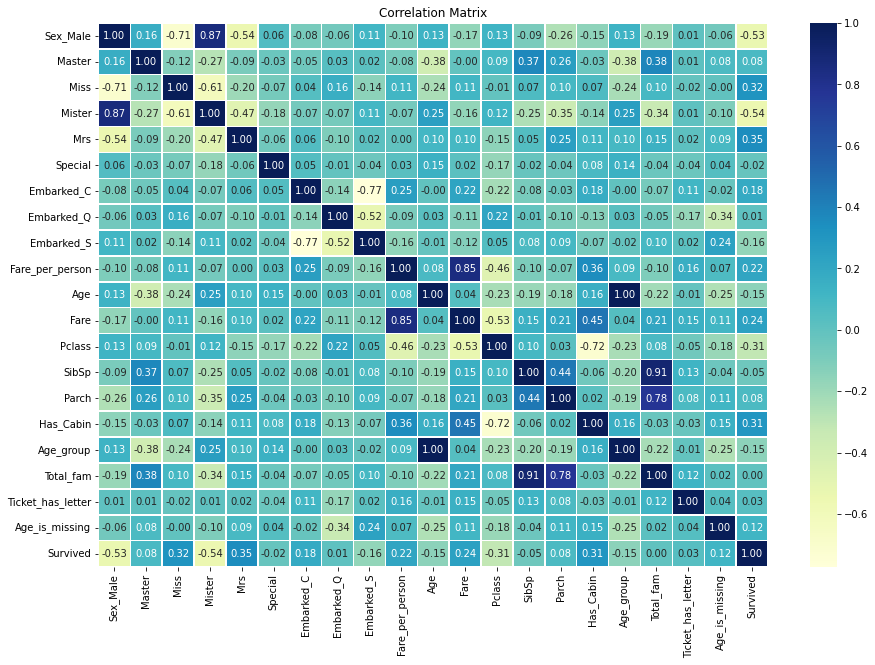

In [ ]:
corr_matrix = train_prep.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth = 0.5, fmt='.2f', cmap='YlGnBu')
ax.set_title('Correlation Matrix');

In [ ]:
['Survived']

1. Sex_Male:
  - Survived: high negative correlation; being male has a lower chance of survival

2. Mister:
- Survived: high negative correlation; having a Mister title has a lower chance of survival

3. Embarked:
- Survived: not much correlation

4. 

### Modelling

In [ ]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [ ]:
# Build model/s
models = {'Logistic Regression': LogisticRegression(),
          'KNN Classifier': KNeighborsClassifier(),
          'Random Forest Classifier': RandomForestClassifier(),
          'LinearSVC': LinearSVC(),
          'GaussianNB': GaussianNB(),
          'MultinomialNB': MultinomialNB(),
          'ComplementNB': ComplementNB(),
          'BernoulliNB': BernoulliNB(),
          'CategoricalNB': CategoricalNB()}

In [ ]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates machine learning models.
    
    Parameters
    ----------
    models (dict) - models to fit and score
    X_train - features training set
    y_train - labels training set
    X_test - features test set
    y_test - labels test set
    
    Returns
    -------
    model_scores - dictionary containing the models' scores
    '''
    np.random.seed(42)
    model_scores = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_test, y_test)
        
    return model_scores

In [ ]:
model_scores = fit_and_score(models, X_train_prep, X_val_prep, y_train, y_val)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'BernoulliNB': 0.8059701492537313,
 'CategoricalNB': 0.8022388059701493,
 'ComplementNB': 0.7873134328358209,
 'GaussianNB': 0.8171641791044776,
 'KNN Classifier': 0.8097014925373134,
 'LinearSVC': 0.8246268656716418,
 'Logistic Regression': 0.832089552238806,
 'MultinomialNB': 0.7985074626865671,
 'Random Forest Classifier': 0.7947761194029851}

#### Logistic Regression
Logistic regression got the highest accuracy score of 83.21%. We try to improve its performance further by tuning its hyperparameters.

In [ ]:
# Hyperparameter distribution for Logistic Regression
log_reg_dist = {'C': [100, 10, 1.0, 0.1, 0.01], 
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
                'max_iter': [100, 1000],
                'penalty': ['none', 'l1', 'l2', 'elasticnet']}

In [ ]:
# Tune Logistic Regression
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(), log_reg_dist,
                                cv=5, verbose=2)

gs_log_reg.fit(X_train_prep, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python

[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/

[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_it

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=100, max_i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END C=100, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END C=100, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...C=100, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=100, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=100, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...C=100, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=100, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=100, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV] END .....C=100, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END .....C=100, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .....C=100, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END .....C=100, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .....C=100, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END ....C=100, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ....C=100, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=100, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ....C=100, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=100, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=100, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END ......C=100, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=100, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=100, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=100, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=100, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=100, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END .....C=100, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .C=100, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=100, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END .......C=100, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=100, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END .......C=100, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=100, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=100, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=1000, penalty=elasticnet, solver=lbfg

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python

[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Sett

[CV] END C=10, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=10, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=10, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=10, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=10, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ....C=10, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=10, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=10, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=10, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_rat

[CV] END ......C=10, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END ......C=10, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......C=10, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END ......C=10, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ......C=10, max_iter=1000, penalty=none, solver=sag; total time=   0.1s
[CV] END .....C=10, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .....C=10, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END .....C=10, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .....C=10, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END .....C=10, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=10, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=10, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=10, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=10, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ........C=10, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END ........C=10, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ........C=10, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END ........C=10, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ........C=10, max_iter=1000, penalty=l2, solver=sag; total time=   0.1s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END .......C=10, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=1000, penalty=elasticnet, solver=lbfgs; total t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ....C=1.0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=1.0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1.0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=1.0, max_iter=100, penalty=none, solver=sag; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV] END ......C=1.0, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1.0, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1.0, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=1.0, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=1.0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=1.0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=1.0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=1.0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=1.0, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=1.0, max_iter=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=1.0, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=1.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END C=1.0, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1.0, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...C=1.0, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=1.0, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=1.0, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=1.0, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=1.0, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=1.0, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.0, max_i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .....C=1.0, max_iter=1000, penalty=none, solver=sag; total time=   0.1s
[CV] END .....C=1.0, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .....C=1.0, max_iter=1000, penalty=none, solver=sag; total time=   0.1s
[CV] END .....C=1.0, max_iter=1000, penalty=none, solver=sag; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ....C=1.0, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=1.0, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ....C=1.0, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=1.0, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ....C=1.0, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=1.0, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=1.0, max_iter=1000, penalty=l1, solver=saga; total time=   0.2s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=1.0, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .C=1.0, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=1.0, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_rat

[CV] END ......C=1.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.2s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, max_iter=1000, penalty=elasticnet, solver=l

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python

[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/

[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_it

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...C=0.1, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.1, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...C=0.1, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END ...C=0.1, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.1, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"



[CV] END C=0.1, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .....C=0.1, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END .....C=0.1, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .....C=0.1, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END .....C=0.1, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END .....C=0.1, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END ....C=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ....C=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ....C=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ....C=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.1, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=0.1, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python

[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 

[CV] END .....C=0.01, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=0.01, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.01, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.01, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.01, max_iter=100, penalty=none, solver=saga; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/

[CV] END ....C=0.01, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penal

[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=lbfgs; tot

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ..C=0.01, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=0.01, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=0.01, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ..C=0.01, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=0.01, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did

[CV] END ....C=0.01, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END ....C=0.01, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ....C=0.01, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END ....C=0.01, max_iter=1000, penalty=none, solver=sag; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ....C=0.01, max_iter=1000, penalty=none, solver=sag; total time=   0.2s
[CV] END ...C=0.01, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV] END ...C=0.01, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ...C=0.01, max_iter=1000, penalty=none, solver=saga; total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END ...C=0.01, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END ...C=0.01, max_iter=1000, penalty=none, solver=saga; total time=   0.2s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
450 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 1000],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [ ]:
gs_log_reg.score(X_val_prep, y_val)

0.8246268656716418

Why did the accuracy score went down to 82%?

In [ ]:
gs_log_reg.best_params_

{'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [ ]:
# Save fitted model
dump(gs_log_reg, 'gs_log_reg_model_1.joblib')

['gs_log_reg_model_1.joblib']

In [ ]:
# Load model
gs_log_reg_model_1 = load('gs_log_reg_model_1.joblib')

##### Feature importance

In [ ]:
gs_log_reg_model_1.best_estimator_.coef_[0]

array([-0.83737749,  1.21656822,  0.44157337, -1.28562487,  1.4471193 ,
       -0.59333147,  0.6445945 ,  0.57940243,  0.00230763,  0.32162757,
       -0.02196446,  0.42013659, -0.53372304, -0.58449116, -0.47825169,
        0.94991101, -0.12500718,  0.16356172,  0.34236729,  0.24985273])

In [ ]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Has_Cabin', 'Age_group', 'Total_fam', 'Fare_per_person', 'Name_title',
       'Ticket_has_letter'],
      dtype='object')

In [ ]:
# Match coef of features to columns
feature_imp_dict = dict(zip(['Sex_Male', 'Master', 'Miss', 'Mister', 'Mrs', 'Special', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Fare_per_person', 'Age', 'Fare' ,'Pclass', 'SibSp', 'Parch',
       'Has_Cabin', 'Age_group', 'Total_fam',
       'Ticket_has_letter',  'Age_is_missing'], gs_log_reg_model_1.best_estimator_.coef_[0]))
feature_imp_dict

{'Age': -0.021964461405161593,
 'Age_group': -0.12500718149199352,
 'Age_is_missing': 0.24985273094131033,
 'Embarked_C': 0.6445945012092404,
 'Embarked_Q': 0.57940242538491,
 'Embarked_S': 0.00230763260011639,
 'Fare': 0.4201365911461357,
 'Fare_per_person': 0.3216275654823775,
 'Has_Cabin': 0.9499110098892216,
 'Master': 1.216568224705131,
 'Miss': 0.44157336620488946,
 'Mister': -1.2856248669213826,
 'Mrs': 1.4471193033300092,
 'Parch': -0.4782516854269241,
 'Pclass': -0.5337230406846669,
 'Sex_Male': -0.8373774855823359,
 'SibSp': -0.5844911575534782,
 'Special': -0.5933314681244001,
 'Ticket_has_letter': 0.34236729198846716,
 'Total_fam': 0.16356171621384283}

In [ ]:
feature_imp_dict_df = pd.DataFrame(feature_imp_dict, index=[0])
feature_imp_dict_df

,Sex_Male,Master,Miss,Mister,Mrs,Special,Embarked_C,Embarked_Q,Embarked_S,Fare_per_person,Age,Fare,Pclass,SibSp,Parch,Has_Cabin,Age_group,Total_fam,Ticket_has_letter,Age_is_missing
0,-0.837377,1.216568,0.441573,-1.285625,1.447119,-0.593331,0.644595,0.579402,0.002308,0.321628,-0.021964,0.420137,-0.533723,-0.584491,-0.478252,0.949911,-0.125007,0.163562,0.342367,0.249853


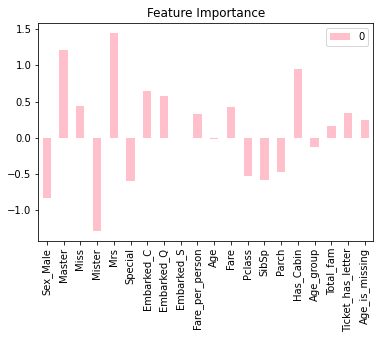

In [ ]:
feature_imp_dict_df.T.plot.bar(title='Feature Importance', legend='False', color='pink');

Feature importance in descending order:

In [ ]:
feature_imp_dict_df.T.sort_values(by=[0], key=abs, ascending=False)

,0
Mrs,1.447119
Mister,-1.285625
Master,1.216568
Has_Cabin,0.949911
Sex_Male,-0.837377
Embarked_C,0.644595
Special,-0.593331
SibSp,-0.584491
Embarked_Q,0.579402
Pclass,-0.533723


Interpretation:
The top 5 most important features are the following:
1. Mrs_title (+)
2. Mister_title (-)
3. Master_title (+)
4. Has_Cabin (+)
5. Sex_Male (-)

- Having a Mrs title, or a Master title, or a Cabin, pushes the model to predict that the passenger survived.
- On the other hand, having a Mister title and being Male, pushes the model to predict that the passenger did not survive.

##### Confusion Matrix

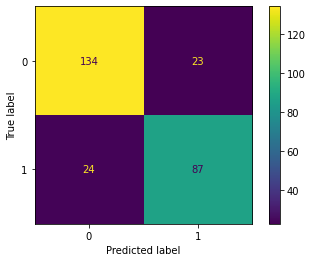

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs_log_reg_model_1, X_val_prep, y_val);

There are 23 False positives and 24 False negatives.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, gs_log_reg_model_1.predict(X_val_prep)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       157
           1       0.79      0.78      0.79       111

    accuracy                           0.82       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.82      0.82      0.82       268



In [ ]:
# Total number of correct predictions based on the confusion matrix
134+87

221

In [ ]:
# Predictions on the validation set
y_val_preds = gs_log_reg_model_1.predict(X_val_prep_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
# Total number of correct predictions
(y_val_preds==y_val).sum()

221

In [ ]:
(y_val_preds==y_val)

709     True
439     True
840     True
720     True
39      True
       ...  
821    False
633     True
456     True
500     True
430    False
Name: Survived, Length: 268, dtype: bool

## Model 2
We use Pandas to transform data

In [ ]:
!dir

gender_submission.csv  test.csv     train.csv  train_with_newfeatures
kaggle.json	       test_pred_2  train_fe


In [ ]:
train_complete = pd.read_csv('train_with_newfeatures')
train_complete

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Cabin,Age_group,Total_fam,Fare_per_person,Name_title,Ticket_has_letter
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,4.0,2,3.62500,Mr,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,7.0,2,35.64165,Mrs,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,5.0,1,7.92500,Miss,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,7.0,2,26.55000,Mrs,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,7.0,1,8.05000,Mr,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,5.0,1,13.00000,Special,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,3.0,1,30.00000,Miss,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,NaN,4,5.86250,Miss,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,5.0,1,30.00000,Mr,0.0


In [ ]:
X = train_complete.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_complete['Survived']

Model 2 FE

In [ ]:
def impute_age(data):
  pdata = data.copy()

  pdata['Age_is_missing'] = pd.notnull(pdata['Age']).astype(int)

  # Mr title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Mr'].index:
      # Add random age value from age group 4: [20, 25) 
      # pdata['Age'][i] = np.random.choice(range(20,25))
      # Range Mr
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Mr']['Age'].min()),round(pdata[pdata['Name_title']=='Mr']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Miss title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Miss'].index:
      # Add random age value from age group 4: [20, 25)
      # pdata['Age'][i] = np.random.choice(range(20,25))
      # Range Miss
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Miss']['Age'].min()),round(pdata[pdata['Name_title']=='Miss']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Mrs title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Mrs'].index:
      # Add random age value from Mrs age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Mrs']['Age'].min()),round(pdata[pdata['Name_title']=='Mrs']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Master title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Master'].index:
      # Add random age value from Master age range
      pdata['Age'][i] = np.random.choice(range(round(pdata[pdata['Name_title']=='Master']['Age'].min()),round(pdata[pdata['Name_title']=='Master']['Age'].max()+1)))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  # Special title fill Age
  for i in pdata[pdata['Age'].isna()][pdata[pdata['Age'].isna()]['Name_title']=='Special'].index:
      # Add random age value from Special (Dr) age range
      pdata['Age'][i] = np.random.choice(range(23,55))
      # Add Age_group value
      pdata['Age_group'][i] = pdata['Age'][i]//5

  return pdata

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Has_Cabin', 'Age_group', 'Total_fam', 'Fare_per_person', 'Name_title',
       'Ticket_has_letter'],
      dtype='object')

In [ ]:
train_with_newfeatures = pd.read_csv()

## Predicting the test set

In [ ]:
whole_train_prep = preprocess_pipeline(train.drop('Survived', axis=1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is adde

In [ ]:
whole_train_y = train['Survived']

In [ ]:
len(whole_train_prep), len(whole_train_y)

(891, 891)

In [ ]:
log_reg = LogisticRegression(C=100, max_iter=1000, penalty = 'l2', solver='newton-cg')

In [ ]:
log_reg.fit(whole_train_prep, whole_train_y)

LogisticRegression(C=100, max_iter=1000, solver='newton-cg')

In [ ]:
test = pd.read_csv('test.csv')
test

In [ ]:
test_prep = preprocess_pipeline(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is adde

In [ ]:
test_pred = log_reg.predict(test_prep)

In [ ]:
test_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
df_test_pred = pd.DataFrame(columns = ['PassengerId', 'Survived'])

In [ ]:
df_test_pred['PassengerId']=test['PassengerId']

In [ ]:
df_test_pred['Survived']=test_pred

In [ ]:
df_test_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
df_test_pred.to_csv('test_pred_2', index=False)

## Dump

In [ ]:
model_scores = fit_and_score(models, X_train_transformed, X_val_transformed, y_train, y_val)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN Classifier': 0.8022388059701493,
 'Logistic Regression': 0.8246268656716418,
 'Random Forest Classifier': 0.8022388059701493}

In [ ]:
model_scores = fit_and_score(models, X_train_transformed_noAgeFare, X_val_transformed_noAgeFare, y_train, y_val)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


{'KNN Classifier': 0.8134328358208955,
 'Logistic Regression': 0.832089552238806,
 'Random Forest Classifier': 0.7873134328358209}

In [ ]:
# Hyperparameter distribution for Logistic Regression
log_reg_dist = {'C': [1], 
                'solver': ['lbfgs', 'liblinear'], 
                'max_iter': [100, 1000]}

In [ ]:
# Tune Logistic Regression
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_dist,
                                n_iter=20, cv=5, verbose=2)

rs_log_reg.fit(X_train_transformed, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.0s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.0s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END ...............C=1, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1,

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1], 'max_iter': [100, 1000],
                                        'solver': ['lbfgs', 'liblinear']},
                   verbose=2)

In [ ]:
rs_log_reg.score(X_val_transformed, y_val)

0.8171641791044776

In [ ]:
# Tune Logistic Regression
np.random.seed(42)

rs_log_reg_1 = RandomizedSearchCV(LogisticRegression(), log_reg_dist,
                                n_iter=20, cv=5, verbose=2)

rs_log_reg_1.fit(X_train_transformed_noAgeFare, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the dat

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ....................C=1, max_iter=100, solver=lbfgs; total time=   0.1s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ................C=1, max_iter=100, solver=liblinear; total time=   0.0s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END ...................C=1, max_iter=1000, solver=lbfgs; total time=   0.1s
[CV] END ...................

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [1], 'max_iter': [100, 1000],
                                        'solver': ['lbfgs', 'liblinear']},
                   verbose=2)

In [ ]:
rs_log_reg_1.score(X_val_transformed_noAgeFare, y_val)

0.832089552238806

In [ ]:
rs_log_reg.score(X_val_transformed_noAgeFare, y_val)

0.832089552238806

In [ ]:
# Hyperparameter distribution for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(100, 1000, 100),
           'max_depth': [None, 3, 5, 10], 
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [ ]:
# Tune RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(), rf_grid,
                                n_iter=5, cv=5, verbose=2)

rs_rf.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   1.4s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   0.9s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   2.3s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   2.5s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   1.7s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=2, n_estimators=700; total time=   1.9s
[CV] END max_depth=None

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=2)

In [ ]:
rs_rf.score(X_val_transformed, y_val)

0.832089552238806

In [ ]:
# Tune RandomForestClassifier
rs_rf_1 = RandomizedSearchCV(RandomForestClassifier(), rf_grid,
                                n_iter=5, cv=5, verbose=2)

rs_rf_1.fit(X_train_transformed_noAgeFare, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=800; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=800; total time=   1.2s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=800; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=800; total time=   3.5s
[CV] END max_depth=None, min_samples_leaf=11, min_samples_split=14, n_estimators=800; total time=   3.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   1.3s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   1.1s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   1.2s
[CV] END max_depth=3, min_samples_leaf=11, min_samples_split=6, n_estimators=600; total time=   1.5s
[CV] END ma

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900])},
                   verbose=2)

In [ ]:
rs_rf_1.score(X_val_transformed_noAgeFare, y_val)

0.8246268656716418

In [ ]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classiffier', LogisticRegression(random_state=1, max_iter=10000))])

param_grid = {'preprocessor__num__imputer__strategy' : ['mean', 'median'],
              'preprocessor__num__discritiser__n_bins' : range(5,10),
              'classiffier__C' : [0.1, 10, 100],
              'classiffier__solver' : ['liblinear', 'saga']}
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=10)
grid_search.fit(X_train, y_train)